Name : Kunal Mody

Batch : DS2312

### Rainfall Weather Forecasting
##### Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
##### 1. Problem Statement: 
    a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

    b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


###### Dataset Description:
Number of columns: 23

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [82]:
df =pd.read_csv('Rainfall.csv') #importing dataset
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [83]:
df.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [84]:
df.tail(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [85]:
df.info() # checking for dataset data type and for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [86]:
df.isnull().sum() # checking total null vvalues for each columns

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<Axes: >

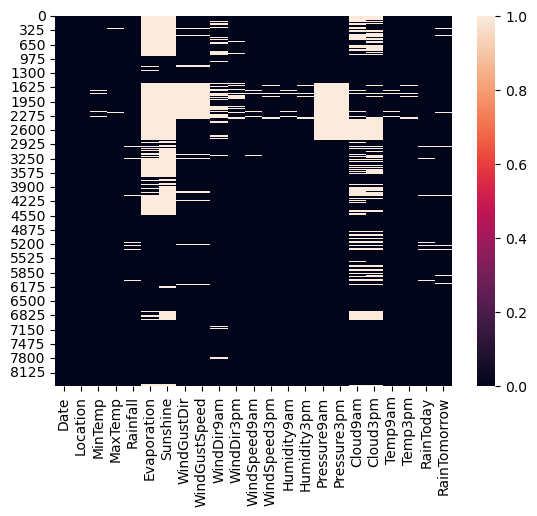

In [87]:
sns.heatmap(df.isnull())# heatmap of null values

In [88]:
df.nunique().to_frame('Total Unique entry')# checking for unique values

Total Unique entry
Date                         3004
Location                       12
MinTemp                       285
MaxTemp                       331
Rainfall                      250
Evaporation                   116
Sunshine                      140
WindGustDir                    16
WindGustSpeed                  52
WindDir9am                     16
WindDir3pm                     16
WindSpeed9am                   34
WindSpeed3pm                   35
Humidity9am                    90
Humidity3pm                    94
Pressure9am                   384
Pressure3pm                   374
Cloud9am                        9
Cloud3pm                        9
Temp9am                       304
Temp3pm                       328
RainToday                       2
RainTomorrow                    2

In [89]:
# from above steps we can say that our dataset has high number of null values and dataset 
# has 16 columns with float64 and 7 columns with  object datatype. 

In [90]:
df.corr('pearson')

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.720955  0.091642     0.348643  0.081365   
MaxTemp        0.720955  1.000000 -0.088906     0.424728  0.523909   
Rainfall       0.091642 -0.088906  1.000000     0.043463 -0.209654   
Evaporation    0.348643  0.424728  0.043463     1.000000  0.340893   
Sunshine       0.081365  0.523909 -0.209654     0.340893  1.000000   
WindGustSpeed  0.241317  0.146113  0.104999     0.214069 -0.018455   
WindSpeed9am   0.137263  0.013425  0.051349     0.176701 -0.025112   
WindSpeed3pm   0.180091  0.088797  0.025185     0.142421  0.045031   
Humidity9am   -0.130906 -0.392496  0.231702    -0.286869 -0.512349   
Humidity3pm    0.079569 -0.424217  0.238730    -0.221244 -0.630536   
Pressure9am   -0.465478 -0.347285 -0.080412    -0.218171  0.028666   
Pressure3pm   -0.458665 -0.430074 -0.037270    -0.233401 -0.047098   
Cloud9am       0.111213 -0.307700  0.195157    -0.084288 -0.705577   
Cloud3pm       0.046889 -0.301675  0.159250    -0.152637 -0.723957   
Temp9am        0.888342  0.869503 -0.007191     0.405467  0.348708   
Temp3pm        0.689652  0.978665 -0.092263     0.414156  0.546057   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.241317      0.137263      0.180091    -0.130906   
MaxTemp             0.146113      0.013425      0.088797    -0.392496   
Rainfall            0.104999      0.051349      0.025185     0.231702   
Evaporation         0.214069      0.176701      0.142421    -0.286869   
Sunshine           -0.018455     -0.025112      0.045031    -0.512349   
WindGustSpeed       1.000000      0.656079      0.711403    -0.286045   
WindSpeed9am        0.656079      1.000000      0.566322    -0.358981   
WindSpeed3pm        0.711403      0.566322      1.000000    -0.252488   
Humidity9am        -0.286045     -0.358981     -0.252488     1.000000   
Humidity3pm        -0.097380     -0.111595     -0.091248     0.636255   
Pressure9am        -0.430736     -0.197189     -0.291271     0.154699   
Pressure3pm        -0.394745     -0.156517     -0.240378     0.188463   
Cloud9am            0.030124     -0.000607      0.005807     0.472126   
Cloud3pm            0.104157      0.068930      0.003894     0.352736   
Temp9am             0.211477      0.109936      0.185329    -0.378389   
Temp3pm             0.106872     -0.002619      0.066201    -0.383788   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.079569    -0.465478    -0.458665  0.111213  0.046889   
MaxTemp          -0.424217    -0.347285    -0.430074 -0.307700 -0.301675   
Rainfall          0.238730    -0.080412    -0.037270  0.195157  0.159250   
Evaporation      -0.221244    -0.218171    -0.233401 -0.084288 -0.152637   
Sunshine         -0.630536     0.028666    -0.047098 -0.705577 -0.723957   
WindGustSpeed    -0.097380    -0.430736    -0.394745  0.030124  0.104157   
WindSpeed9am     -0.111595    -0.197189    -0.156517 -0.000607  0.068930   
WindSpeed3pm     -0.091248    -0.291271    -0.240378  0.005807  0.003894   
Humidity9am       0.636255     0.154699     0.188463  0.472126  0.352736   
Humidity3pm       1.000000     0.001763     0.076002  0.509797  0.520221   
Pressure9am       0.001763     1.000000     0.961922 -0.091391 -0.104535   
Pressure3pm       0.076002     0.961922     1.000000 -0.015692 -0.035986   
Cloud9am          0.509797    -0.091391    -0.015692  1.000000  0.619202   
Cloud3pm          0.520221    -0.104535    -0.035986  0.619202  1.000000   
Temp9am          -0.130973    -0.441901    -0.472788 -0.161867 -0.151438   
Temp3pm          -0.491634    -0.302488    -0.394852 -0.326547 -0.348986   

                Temp9am   Temp3pm  
MinTemp        0.888342  0.689652  
MaxTemp        0.869503  0.978665  
Rainfall      -0.007191 -0.092263  
Evaporation    0.405467  0.414156  
Sunshine       0.348708  0.546057  
WindGustSpeed  0.211477  0.106872  
WindSpeed9am   0.109936 -0.002619  
Wi

In [91]:
df.describe().T

count         mean        std    min      25%     50%     75%  \
MinTemp        8350.0    13.193305   5.403596   -2.0     9.20    13.3    17.4   
MaxTemp        8365.0    23.859976   6.136408    8.2    19.30    23.3    28.0   
Rainfall       8185.0     2.805913  10.459379    0.0     0.00     0.0     1.0   
Evaporation    4913.0     5.389395   5.044484    0.0     2.60     4.6     7.0   
Sunshine       4431.0     7.632205   3.896235    0.0     4.75     8.7    10.7   
WindGustSpeed  7434.0    40.174469  14.665721    7.0    30.00    39.0    50.0   
WindSpeed9am   8349.0    13.847646  10.174579    0.0     6.00    13.0    20.0   
WindSpeed3pm   8318.0    18.533662   9.766986    0.0    11.00    19.0    24.0   
Humidity9am    8366.0    67.822496  16.833283   10.0    56.00    68.0    80.0   
Humidity3pm    8323.0    51.249790  18.423774    6.0    39.00    51.0    63.0   
Pressure9am    7116.0  1017.640233   6.828699  989.8  1013.00  1017.7  1022.3   
Pressure3pm    7113.0  1015.236075   6.766681  982.9  1010.40  1015.3  1019.8   
Cloud9am       6004.0     4.566622   2.877658    0.0     1.00     5.0     7.0   
Cloud3pm       5970.0     4.503183   2.731659    0.0     2.00     5.0     7.0   
Temp9am        8369.0    17.762015   5.627035    1.9    13.80    17.8    21.9   
Temp3pm        8329.0    22.442934   5.980020    7.3    18.00    21.9    26.4   

                  max  
MinTemp          28.5  
MaxTemp          45.5  
Rainfall        371.0  
Evaporation     145.0  
Sunshine         13.9  
WindGustSpeed   107.0  
WindSpeed9am     63.0  
WindSpeed3pm     83.0  
Humidity9am     100.0  
Humidity3pm      99.0  
Pressure9am    1039.0  
Pressure3pm    1036.0  
Cloud9am          8.0  
Cloud3pm          8.0  
Temp9am          39.4  
Temp3pm          44.1

In [92]:
df.skew()

MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
dtype: float64

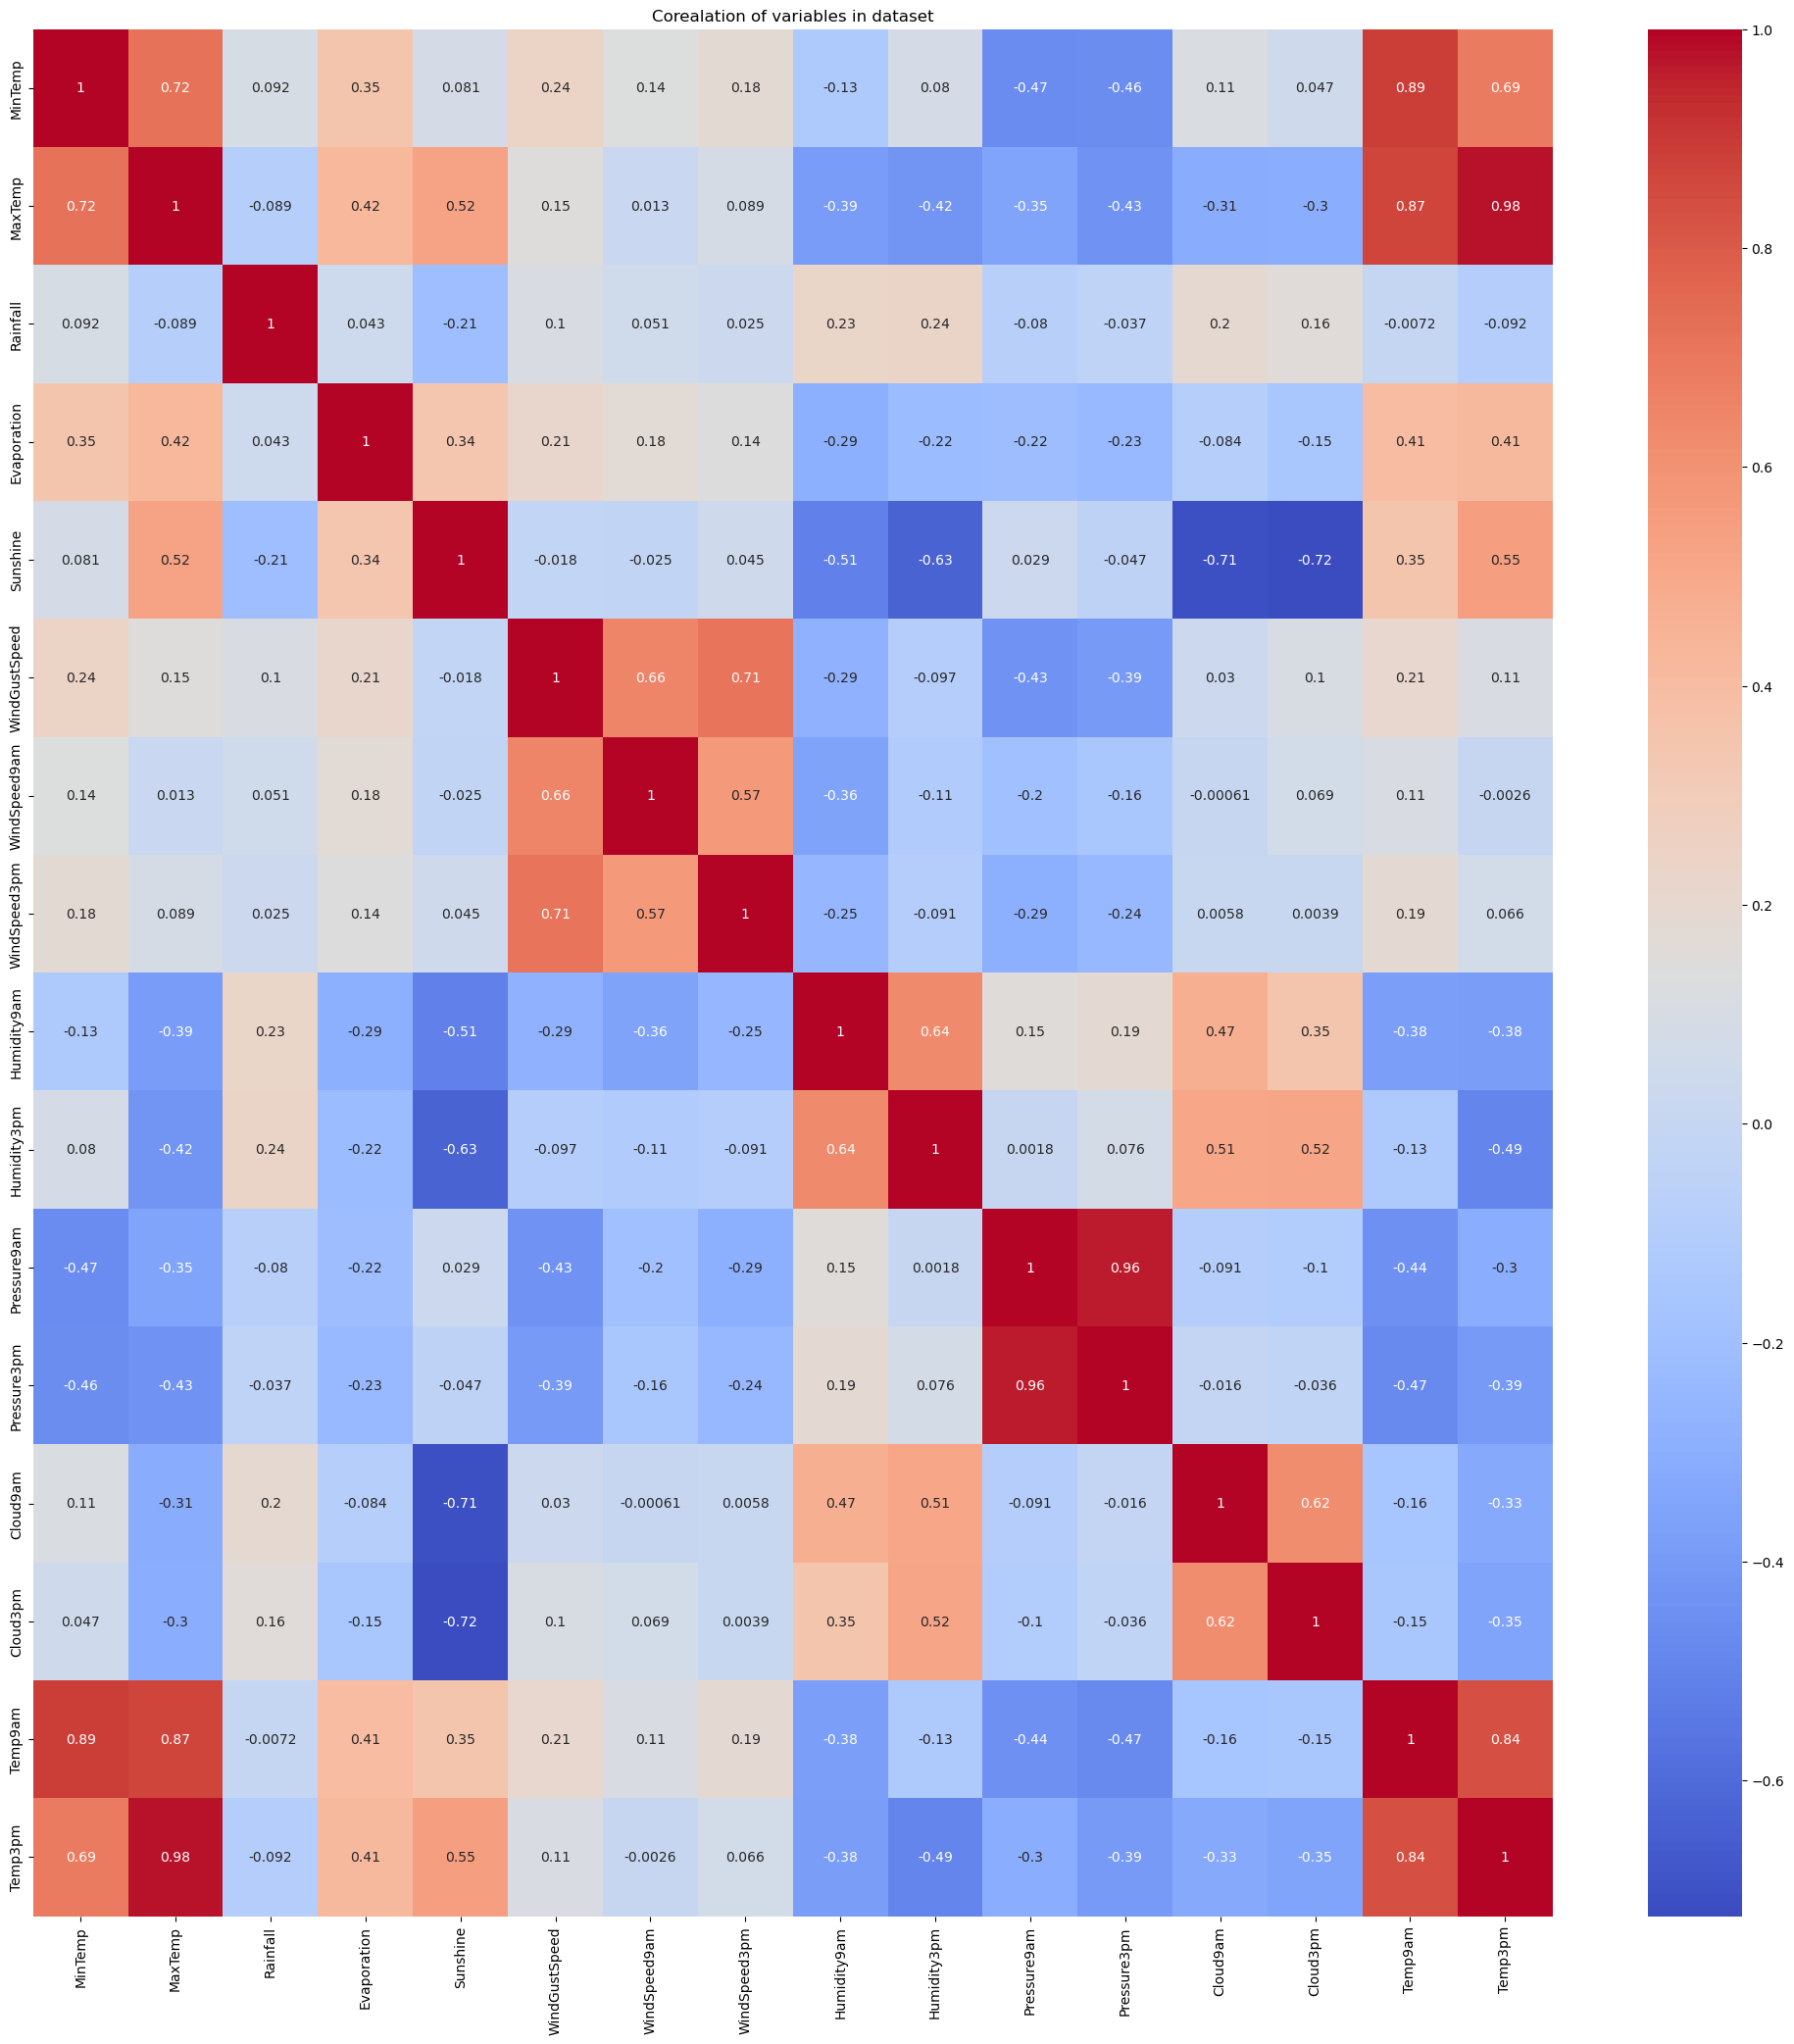

In [93]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot =True, cmap = 'coolwarm')
plt.title('Corealation of variables in dataset')
plt.show()

In [94]:
# as we have high numbers of null values that needs to deal with 1st

In [95]:
df1 = df.copy()

In [96]:
df1.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [97]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [98]:
missing_values = df1.isnull().sum().sort_values(ascending = False) # checking % of data missing
per_of_missing_values = (missing_values/len(df1))*100
print(pd.concat([missing_values,per_of_missing_values],axis = 1,keys =['Missing Values', ' % of missing data ']))

               Missing Values   % of missing data 
Sunshine                 3994            47.406528
Evaporation              3512            41.685460
Cloud3pm                 2455            29.139466
Cloud9am                 2421            28.735905
Pressure3pm              1312            15.572700
Pressure9am              1309            15.537092
WindGustDir               991            11.762611
WindGustSpeed             991            11.762611
WindDir9am                829             9.839763
WindDir3pm                308             3.655786
RainToday                 240             2.848665
Rainfall                  240             2.848665
RainTomorrow              239             2.836795
WindSpeed3pm              107             1.270030
Humidity3pm               102             1.210682
Temp3pm                    96             1.139466
WindSpeed9am               76             0.902077
MinTemp                    75             0.890208
MaxTemp                    60  

In [99]:
# we can see that 'Sunshine', 'Evaporation', 'Cloud3pm','Cloud9am','Pressure3pm','Pressure9am','WindGustDir','WindGustSpeed' 
# columns has more then 10% of data missing. 'Sunshine' and 'Evaporation' has more then 40% data missing

In [100]:
Num_col =['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am'
          ,'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

In [101]:
df1[Num_col] = df1[Num_col].fillna(0)
df1

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          0.0       0.0   
1     2008-12-02   Albury      7.4     25.1       0.0          0.0       0.0   
2     2008-12-03   Albury     12.9     25.7       0.0          0.0       0.0   
3     2008-12-04   Albury      9.2     28.0       0.0          0.0       0.0   
4     2008-12-05   Albury     17.5     32.3       1.0          0.0       0.0   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          0.0       0.0   
8421  2017-06-22    Uluru      3.6     25.3       0.0          0.0       0.0   
8422  2017-06-23    Uluru      5.4     26.9       0.0          0.0       0.0   
8423  2017-06-24    Uluru      7.8     27.0       0.0          0.0       0.0   
8424  2017-06-25    Uluru     14.9      0.0       0.0          0.0       0.0   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            0.0        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       0.0     16.9     21.8   
1          1010.6       1007.8       0.0       0.0     17.2     24.3   
2          1007.6       1008.7       0.0       2.0     21.0     23.2   
3          1017.6       1012.8       0.0       0.0     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       0.0       0.0     10.1     22.4   
8421       1023.5       1019.1       0.0       0.0     10.9     24.5   
8422       1021.0       1016.8       0.0       0.0     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [103]:
df1.sample(15)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
5555  2010-05-17     Melbourne      7.3     17.2       0.0          2.2   
7586  2012-10-12  PerthAirport     13.2     26.5       0.0          6.6   
1503  2010-10-27  CoffsHarbour     15.1     25.0       0.0          2.0   
2235  2015-05-27     Newcastle      0.0     19.4       0.0          0.0   
3184  2016-10-16   Williamtown      8.0     28.8       0.0          0.0   
3401  2017-05-21   Williamtown     13.3     21.5       0.2          0.0   
4680  2010-03-14     Melbourne     13.8     28.8       0.0          5.8   
1261  2010-02-27  CoffsHarbour     18.9     26.8       6.2          4.6   
558   2010-06-12        Albury      0.0     13.3       0.0          0.0   
2580  2015-01-15       Penrith     18.7     31.7       0.0          0.0   
3201  2016-11-02   Williamtown     11.1     22.9       0.0          0.0   
2089  2015-01-01     Newcastle     19.2     33.2       0.0          0.0   
1829  2014-04-16     Newcastle     15.0     23.2      21.8          0.0   
1878  2014-06-04     Newcastle      9.5     21.0       0.0          0.0   
7947  2013-12-06  PerthAirport     18.2     33.8       0.4         10.4   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
5555       5.7           N           26.0        WNW  ...        87.0   
7586      10.1         WNW           56.0          N  ...        62.0   
1503      11.3         NNE           41.0        SSE  ...        75.0   
2235       0.0         NaN            0.0        NaN  ...         0.0   
3184       0.0           N           35.0         NW  ...        63.0   
3401       0.0         SSE           26.0         NW  ...        95.0   
4680      11.5           N           39.0          N  ...        66.0   
1261       6.8          SW           31.0         SW  ...        86.0   
558        0.0           W           22.0        NaN  ...        95.0   
2580       0.0          SE           30.0        SSE  ...        48.0   
3201       0.0         SSE           31.0        WNW  ...        52.0   
2089       0.0         NaN            0.0         NE  ...        68.0   
1829       0.0         NaN            0.0         SW  ...        77.0   
1878       0.0         NaN            0.0         NW  ...        68.0   
7947      10.9          NE           50.0        NNE  ...        27.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
5555         56.0       1021.3       1019.0       7.0       7.0      8.5   
7586         58.0       1014.4       1013.6       4.0       4.0     23.1   
1503         63.0       1016.8       1013.7       1.0       1.0     21.0   
2235         60.0          0.0          0.0       0.0       7.0      0.0   
3184         26.0       1016.5       1010.4       0.0       0.0     18.1   
3401         62.0       1020.3       1018.8       7.0       0.0     17.2   
4680         30.0       1029.5       1025.4       2.0       1.0     17.6   
1261         66.0       1021.6       1019.0       7.0       7.0     22.0   
558          51.0       1025.4       1024.3       5.0       0.0      3.3   
2580         35.0          0.0          0.0       0.0       0.0     25.5   
3201         32.0       1015.0       1013.4       0.0       0.0     18.7   
2089         44.0          0.0          0.0       3.0       1.0     25.5   
1829         59.0          0.0          0.0       7.0       5.0     18.0   
1878         63.0          0.0          0.0       0.0       2.0     13.0   
7947         30.0       1006.6       1002.8       3.0       7.0     29.5   

      Temp3pm  RainToday  RainTomorrow  
5555     16.9         No            No  
7586     23.4         No            No  
1503     24.4         No            No  
2235     18.0         No            No  
3184     28.2         No            No  
3401     20.4         No            No  
4680     27.8         No            No  
1261     25.8        Yes            No  
558      12.3         No            No  
2580     31.0  

In [104]:
df1['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [105]:
df1['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [106]:
# we know that data don't play significant roll on rain so we will drop that column

In [107]:
df1=df1.drop(columns=['Date'])
df1

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      Albury     13.4     22.9       0.6          0.0       0.0           W   
1      Albury      7.4     25.1       0.0          0.0       0.0         WNW   
2      Albury     12.9     25.7       0.0          0.0       0.0         WSW   
3      Albury      9.2     28.0       0.0          0.0       0.0          NE   
4      Albury     17.5     32.3       1.0          0.0       0.0           W   
...       ...      ...      ...       ...          ...       ...         ...   
8420    Uluru      2.8     23.4       0.0          0.0       0.0           E   
8421    Uluru      3.6     25.3       0.0          0.0       0.0         NNW   
8422    Uluru      5.4     26.9       0.0          0.0       0.0           N   
8423    Uluru      7.8     27.0       0.0          0.0       0.0          SE   
8424    Uluru     14.9      0.0       0.0          0.0       0.0         NaN   

      WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0              44.0          W        WNW  ...         71.0         22.0   
1              44.0        NNW        WSW  ...         44.0         25.0   
2              46.0          W        WSW  ...         38.0         30.0   
3              24.0         SE          E  ...         45.0         16.0   
4              41.0        ENE         NW  ...         82.0         33.0   
...             ...        ...        ...  ...          ...          ...   
8420           31.0         SE        ENE  ...         51.0         24.0   
8421           22.0         SE          N  ...         56.0         21.0   
8422           37.0         SE        WNW  ...         53.0         24.0   
8423           28.0        SSE          N  ...         51.0         24.0   
8424            0.0        ESE        ESE  ...         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       0.0     16.9     21.8   
1          1010.6       1007.8       0.0       0.0     17.2     24.3   
2          1007.6       1008.7       0.0       2.0     21.0     23.2   
3          1017.6       1012.8       0.0       0.0     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       0.0       0.0     10.1     22.4   
8421       1023.5       1019.1       0.0       0.0     10.9     24.5   
8422       1021.0       1016.8       0.0       0.0     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 22 columns]

In [108]:
 df1.loc[df1['RainTomorrow']==' '] #Checking blank values in target column

Empty DataFrame
Columns: [Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 22 columns]

In [109]:
df1.loc[df1['RainToday']==' ']

Empty DataFrame
Columns: [Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 22 columns]

In [110]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df1['RainTomorrow']= encode.fit_transform(df1['RainTomorrow'])
df1['RainToday'] =encode.fit_transform(df1['RainToday'])
df1.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          0.0       0.0           W   
1   Albury      7.4     25.1       0.0          0.0       0.0         WNW   
2   Albury     12.9     25.7       0.0          0.0       0.0         WSW   
3   Albury      9.2     28.0       0.0          0.0       0.0          NE   
4   Albury     17.5     32.3       1.0          0.0       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0           44.0          W        WNW  ...         71.0         22.0   
1           44.0        NNW        WSW  ...         44.0         25.0   
2           46.0          W        WSW  ...         38.0         30.0   
3           24.0         SE          E  ...         45.0         16.0   
4           41.0        ENE         NW  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       0.0     16.9     21.8          0   
1       1010.6       1007.8       0.0       0.0     17.2     24.3          0   
2       1007.6       1008.7       0.0       2.0     21.0     23.2          0   
3       1017.6       1012.8       0.0       0.0     18.1     26.5          0   
4       1010.8       1006.0       7.0       8.0     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 22 columns]

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [112]:
df1.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
dtype: int64

In [113]:
df1['Location'] =encode.fit_transform(df1['Location'])
df1['WindGustDir']= encode.fit_transform(df1['WindGustDir'])
df1['WindDir9am'] =encode.fit_transform(df1['WindDir9am'])
df1['WindDir3pm'] = encode.fit_transform(df1['WindDir3pm'])

In [114]:
df1

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4     22.9       0.6          0.0       0.0   
1            1      7.4     25.1       0.0          0.0       0.0   
2            1     12.9     25.7       0.0          0.0       0.0   
3            1      9.2     28.0       0.0          0.0       0.0   
4            1     17.5     32.3       1.0          0.0       0.0   
...        ...      ...      ...       ...          ...       ...   
8420         9      2.8     23.4       0.0          0.0       0.0   
8421         9      3.6     25.3       0.0          0.0       0.0   
8422         9      5.4     26.9       0.0          0.0       0.0   
8423         9      7.8     27.0       0.0          0.0       0.0   
8424         9     14.9      0.0       0.0          0.0       0.0   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0              13           44.0          13          14  ...         71.0   
1              14           44.0           6          15  ...         44.0   
2              15           46.0          13          15  ...         38.0   
3               4           24.0           9           0  ...         45.0   
4              13           41.0           1           7  ...         82.0   
...           ...            ...         ...         ...  ...          ...   
8420            0           31.0           9           1  ...         51.0   
8421            6           22.0           9           3  ...         56.0   
8422            3           37.0           9          14  ...         53.0   
8423            9           28.0          10           3  ...         51.0   
8424           16            0.0           2           2  ...         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1       8.0       0.0     16.9   
1            25.0       1010.6       1007.8       0.0       0.0     17.2   
2            30.0       1007.6       1008.7       0.0       2.0     21.0   
3            16.0       1017.6       1012.8       0.0       0.0     18.1   
4            33.0       1010.8       1006.0       7.0       8.0     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3       0.0       0.0     10.1   
8421         21.0       1023.5       1019.1       0.0       0.0     10.9   
8422         24.0       1021.0       1016.8       0.0       0.0     12.5   
8423         24.0       1019.4       1016.5       3.0       2.0     15.1   
8424         36.0       1020.2       1017.9       8.0       8.0     15.0   

      Temp3pm  RainToday  RainTomorrow  
0        21.8          0             0  
1        24.3          0             0  
2        23.2          0             0  
3        26.5          0             0  
4        29.7          0             0  
...       ...        ...           ...  
8420     22.4          0             0  
8421     24.5          0             0  
8422     26.1          0             0  
8423     26.0          0             0  
8424     20.9          0             2  

[8425 rows x 22 columns]

In [115]:
df1['WindGustDir'].fillna(0)
df1['WindDir9am'].fillna(0)
df1['WindDir3pm'].fillna(0)
df1.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [116]:
df1.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.110733  0.059202  0.005801     0.050273 -0.093480   
MinTemp        0.110733  1.000000  0.687010  0.078379     0.269000  0.148567   
MaxTemp        0.059202  0.687010  1.000000 -0.078789     0.300480  0.292542   
Rainfall       0.005801  0.078379 -0.078789  1.000000    -0.004287 -0.087678   
Evaporation    0.050273  0.269000  0.300480 -0.004287     1.000000  0.471806   
Sunshine      -0.093480  0.148567  0.292542 -0.087678     0.471806  1.000000   
WindGustDir    0.005877 -0.160011 -0.228836  0.054802    -0.177694 -0.263208   
WindGustSpeed  0.136445  0.202161  0.144550  0.042945     0.251020  0.234789   
WindDir9am    -0.077362 -0.163991 -0.256786  0.076328    -0.140462 -0.197625   
WindDir3pm    -0.024786 -0.169550 -0.201612  0.039079    -0.073763 -0.103347   
WindSpeed9am   0.214121  0.153991  0.033900  0.047036     0.249515  0.218448   
WindSpeed3pm   0.222814  0.196907  0.110711  0.023499     0.210712  0.182165   
Humidity9am   -0.001276 -0.066579 -0.324652  0.218504    -0.273290 -0.338203   
Humidity3pm    0.048922  0.101987 -0.353094  0.227973    -0.157090 -0.274827   
Pressure9am   -0.079091  0.096481  0.059923 -0.003696     0.284469  0.361157   
Pressure3pm   -0.075982  0.096213  0.058520 -0.002492     0.282718  0.358763   
Cloud9am       0.030155  0.184237 -0.162575  0.193136     0.040270 -0.076584   
Cloud3pm       0.024060  0.140444 -0.147034  0.162555     0.028645 -0.041103   
Temp9am        0.109080  0.883019  0.825243 -0.005127     0.325826  0.272485   
Temp3pm        0.051384  0.664805  0.905600 -0.079848     0.289447  0.295100   
RainToday      0.029488  0.056740 -0.188445  0.354926    -0.092402 -0.137973   
RainTomorrow   0.028247  0.088597 -0.142714  0.166511    -0.053344 -0.188353   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location          0.005877       0.136445   -0.077362   -0.024786  ...   
MinTemp          -0.160011       0.202161   -0.163991   -0.169550  ...   
MaxTemp          -0.228836       0.144550   -0.256786   -0.201612  ...   
Rainfall          0.054802       0.042945    0.076328    0.039079  ...   
Evaporation      -0.177694       0.251020   -0.140462   -0.073763  ...   
Sunshine         -0.263208       0.234789   -0.197625   -0.103347  ...   
WindGustDir       1.000000      -0.339586    0.416568    0.511229  ...   
WindGustSpeed    -0.339586       1.000000   -0.281510   -0.053625  ...   
WindDir9am        0.416568      -0.281510    1.000000    0.263182  ...   
WindDir3pm        0.511229      -0.053625    0.263182    1.000000  ...   
WindSpeed9am     -0.172466       0.604853   -0.282923   -0.026733  ...   
WindSpeed3pm     -0.074581       0.601940   -0.173461   -0.042760  ...   
Humidity9am       0.062811      -0.197811    0.158823   -0.001220  ...   
Humidity3pm       0.055726      -0.051263    0.131320   -0.037777  ...   
Pressure9am      -0.346904       0.535393   -0.205958   -0.106379  ...   
Pressure3pm      -0.345703       0.535645   -0.204583   -0.106675  ...   
Cloud9am          0.043686       0.019174    0.050408    0.035080  ...   
Cloud3pm          0.048134       0.049228   -0.002973    0.020756  ...   
Temp9am          -0.183148       0.177570   -0.231708   -0.191673  ...   
Temp3pm          -0.250924       0.137475   -0.260125   -0.253369  ...   
RainToday         0.108446       0.078888    0.134709    0.094129  ...   
RainTomorrow      0.052880       0.133148    0.017815    0.024908  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Location         -0.001276     0.048922    -0.079091    -0.075982  0.030155   
MinTemp          -0.066579     0.101987     0.096481     0.096213  0.184237   
MaxTemp          -0.324652    -0.353094     0.059923     0.058520 -0.162575   
Rainfall          0.218504     0.227973    -0.003696    -0.002492  0.193136   
Evaporation      -0.273290    -0.157090     0.284469     0.282718  0.040270 

<Axes: >

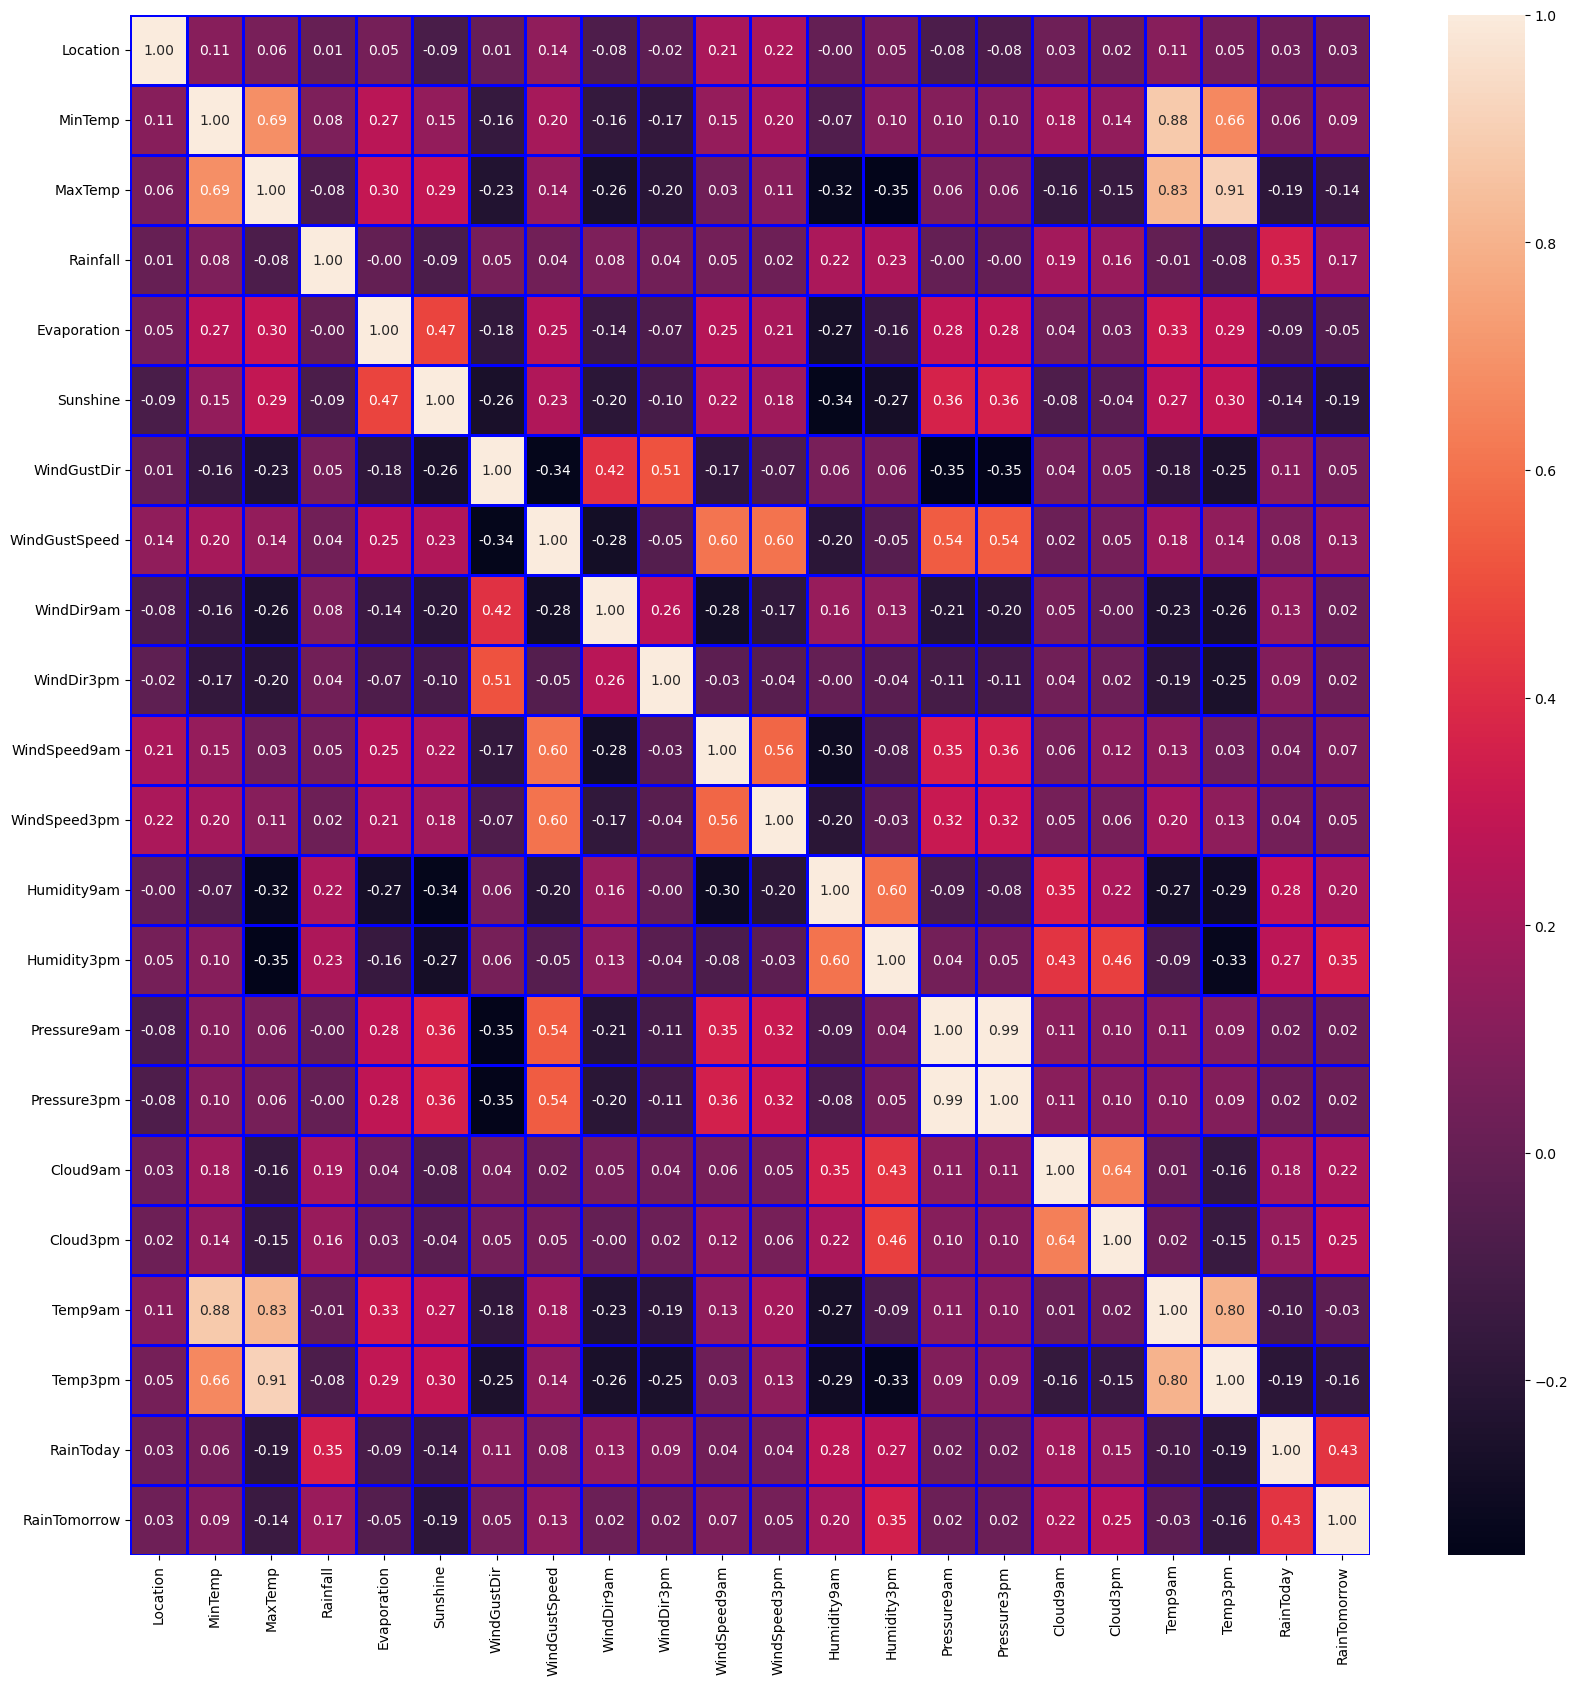

In [117]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,linewidths=1,linecolor ='blue',fmt='.2f')

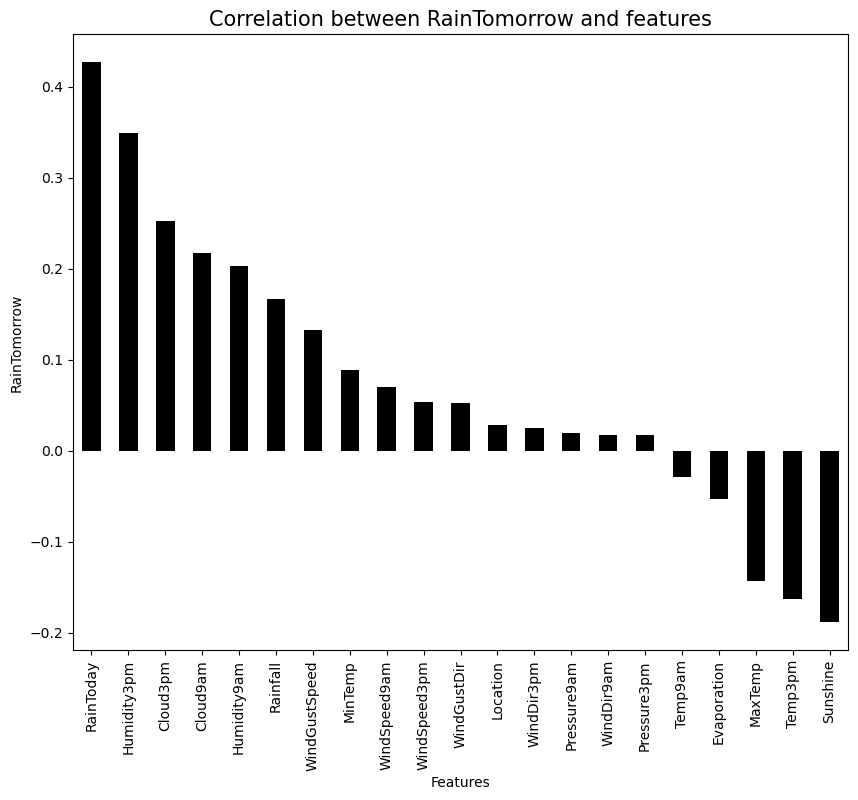

In [118]:
plt.figure(figsize=(10,8))
df1.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='k')
plt.xlabel('Features',fontsize=10)
plt.ylabel('RainTomorrow',fontsize=10)
plt.title('Correlation between RainTomorrow and features',fontsize=15)
plt.show()

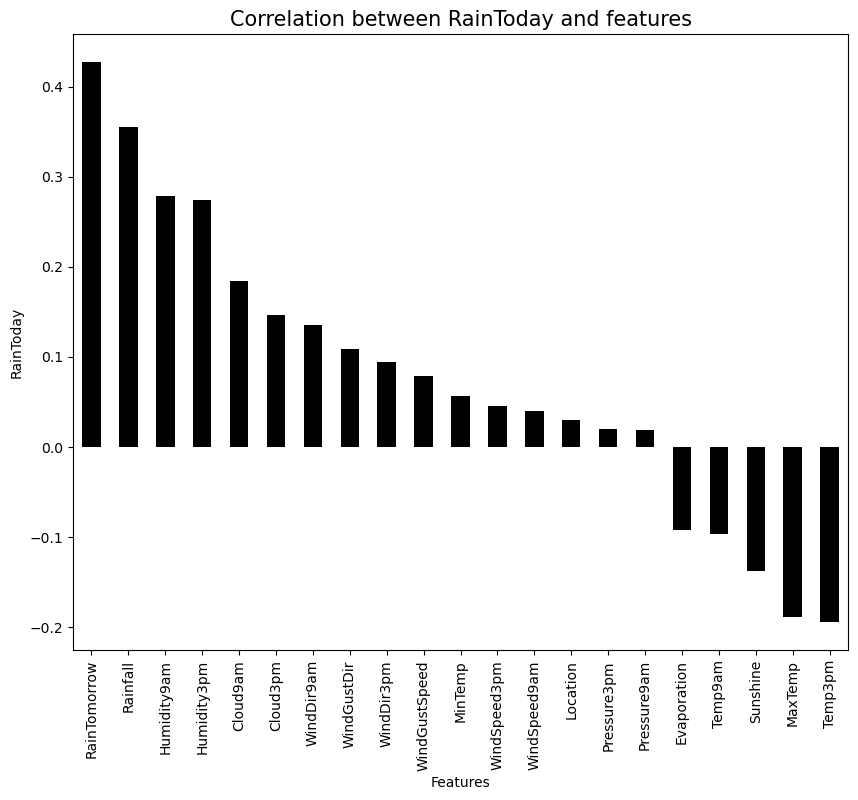

In [119]:
plt.figure(figsize=(10,8))
df1.corr()['RainToday'].sort_values(ascending=False).drop(['RainToday']).plot(kind='bar',color='k')
plt.xlabel('Features',fontsize=10)
plt.ylabel('RainToday',fontsize=10)
plt.title('Correlation between RainToday and features',fontsize=15)
plt.show()

In [120]:
df1.shape

(8425, 22)

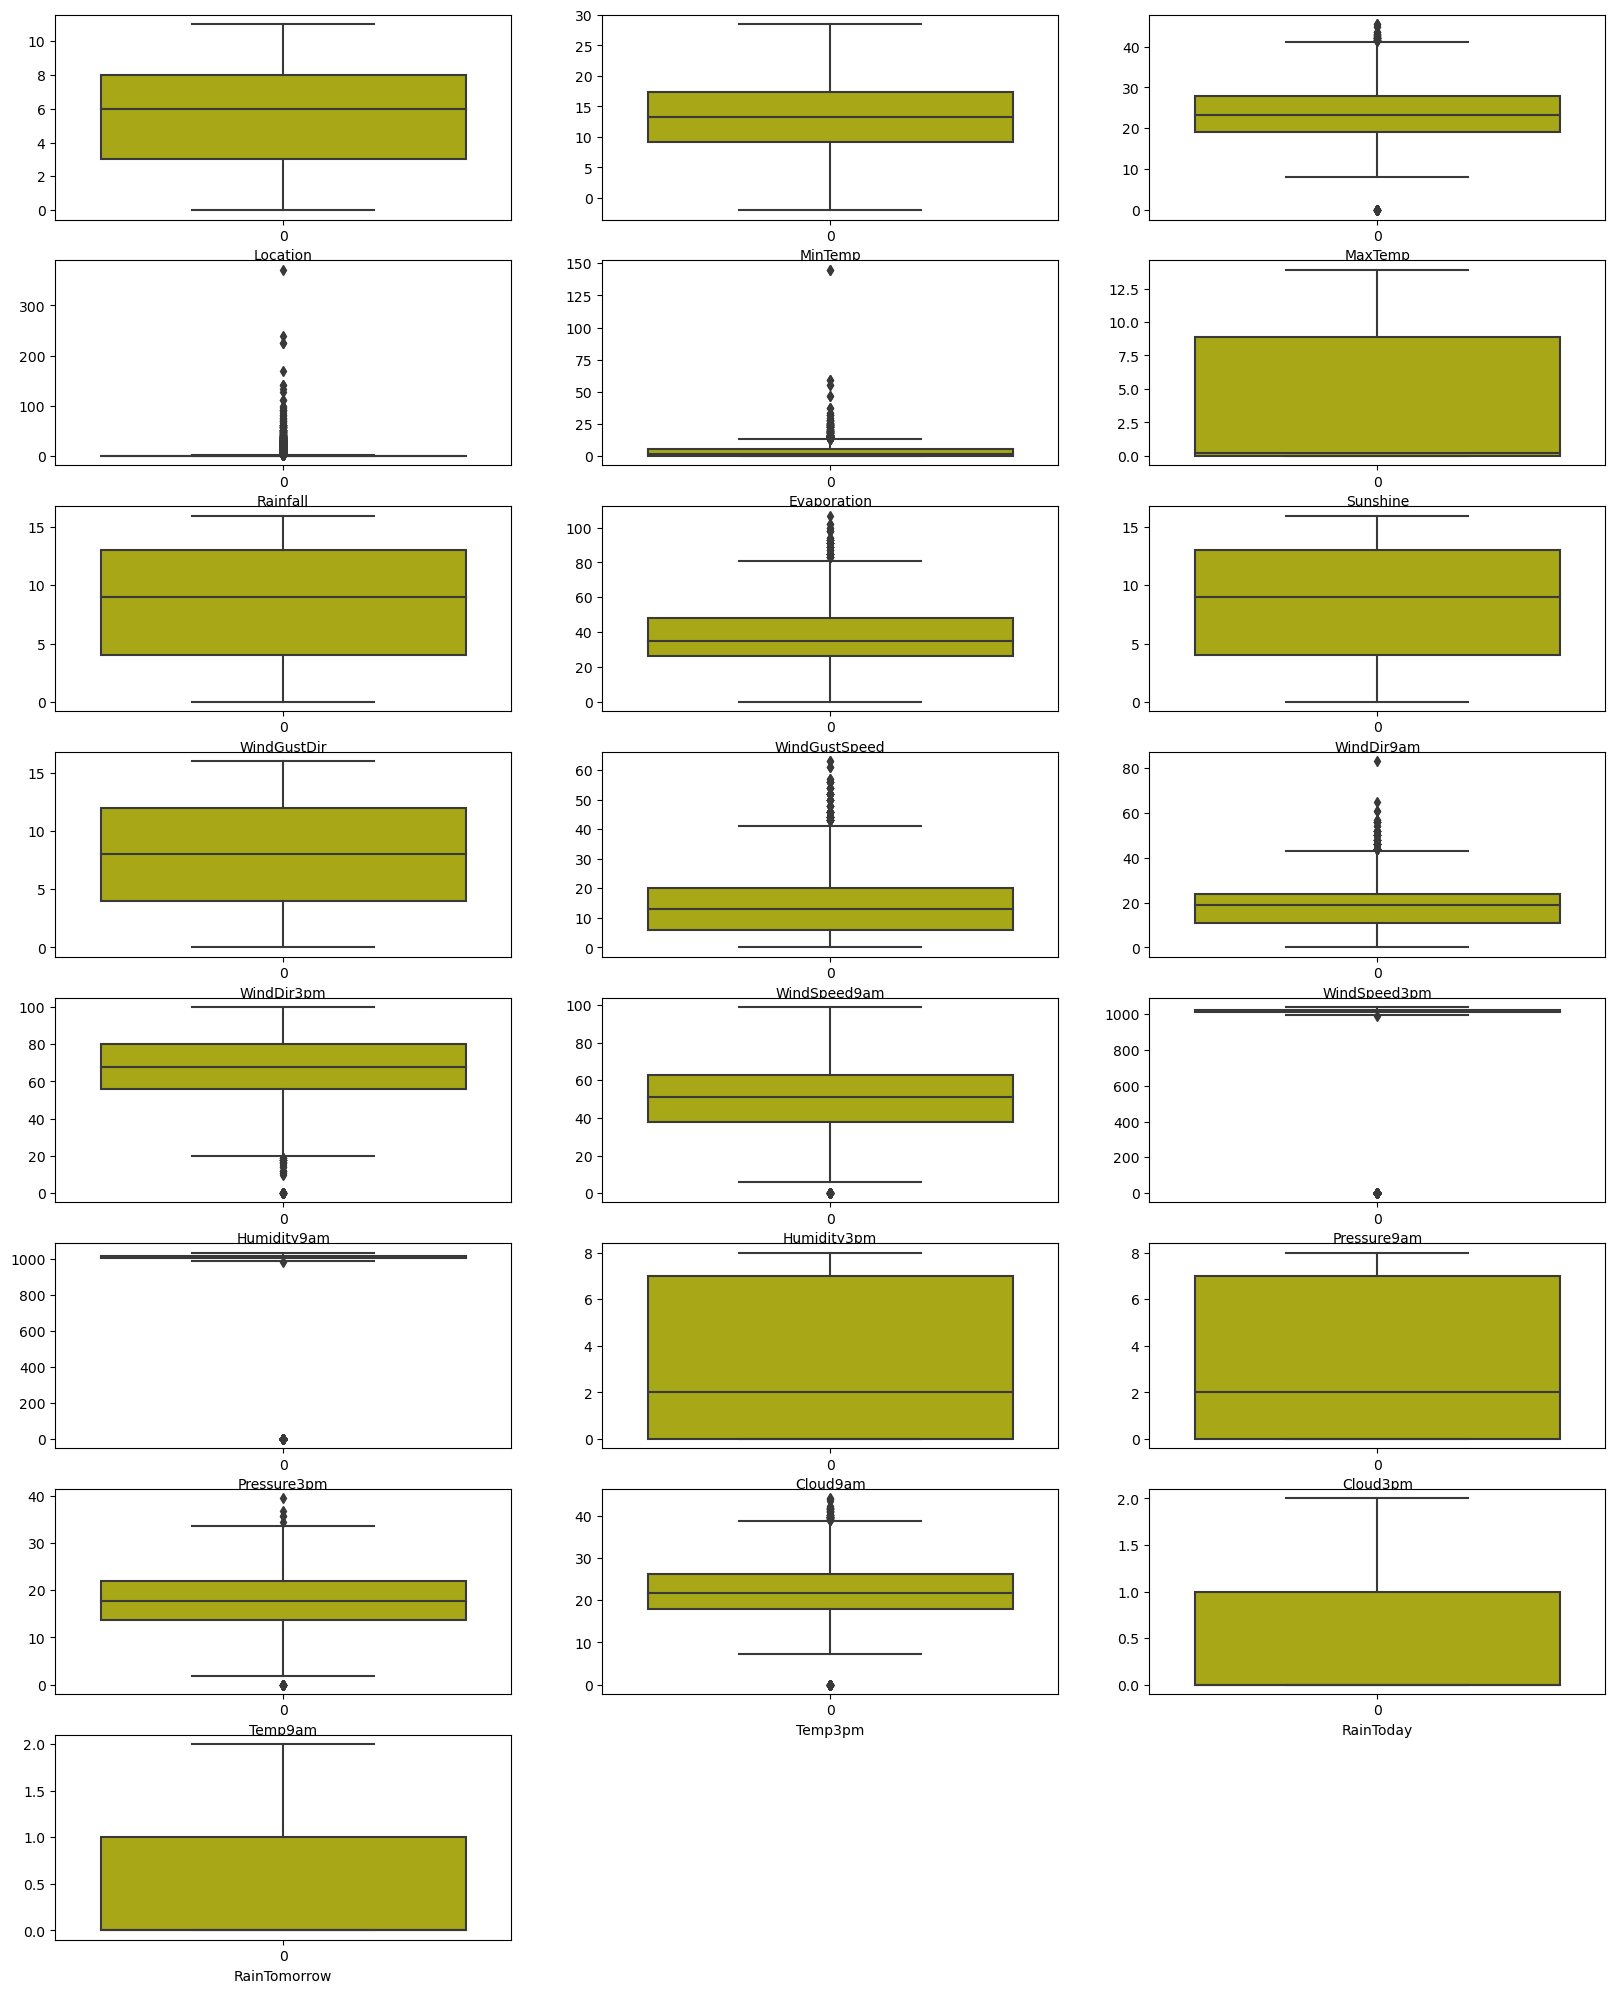

In [121]:
plt.figure(figsize=(20,25), facecolor ='white')
p=1
for i in df1.columns:
    if p<=22:
        plt.subplot(8,3,p)
        sns.boxplot(df1[i],color='y')
        plt.xlabel(i)
    p+=1
plt.show()

In [122]:
df1.skew()

Location         -0.050456
MinTemp          -0.140984
MaxTemp           0.042661
Rainfall         13.200523
Evaporation       8.735663
Sunshine          0.606448
WindGustDir      -0.183350
WindGustSpeed    -0.070806
WindDir9am       -0.068691
WindDir3pm       -0.070695
WindSpeed9am      0.951215
WindSpeed3pm      0.450586
Humidity9am      -0.531904
Humidity3pm      -0.031454
Pressure9am      -1.901812
Pressure3pm      -1.898091
Cloud9am          0.298557
Cloud3pm          0.328823
Temp9am          -0.144067
Temp3pm          -0.052635
RainToday         1.521128
RainTomorrow      1.520255
dtype: float64

In [123]:
#columns with high outliers like 'Rainfall', 'Evaporation' has high skew as well
#We will check corelation of Raintomorrow with other columns

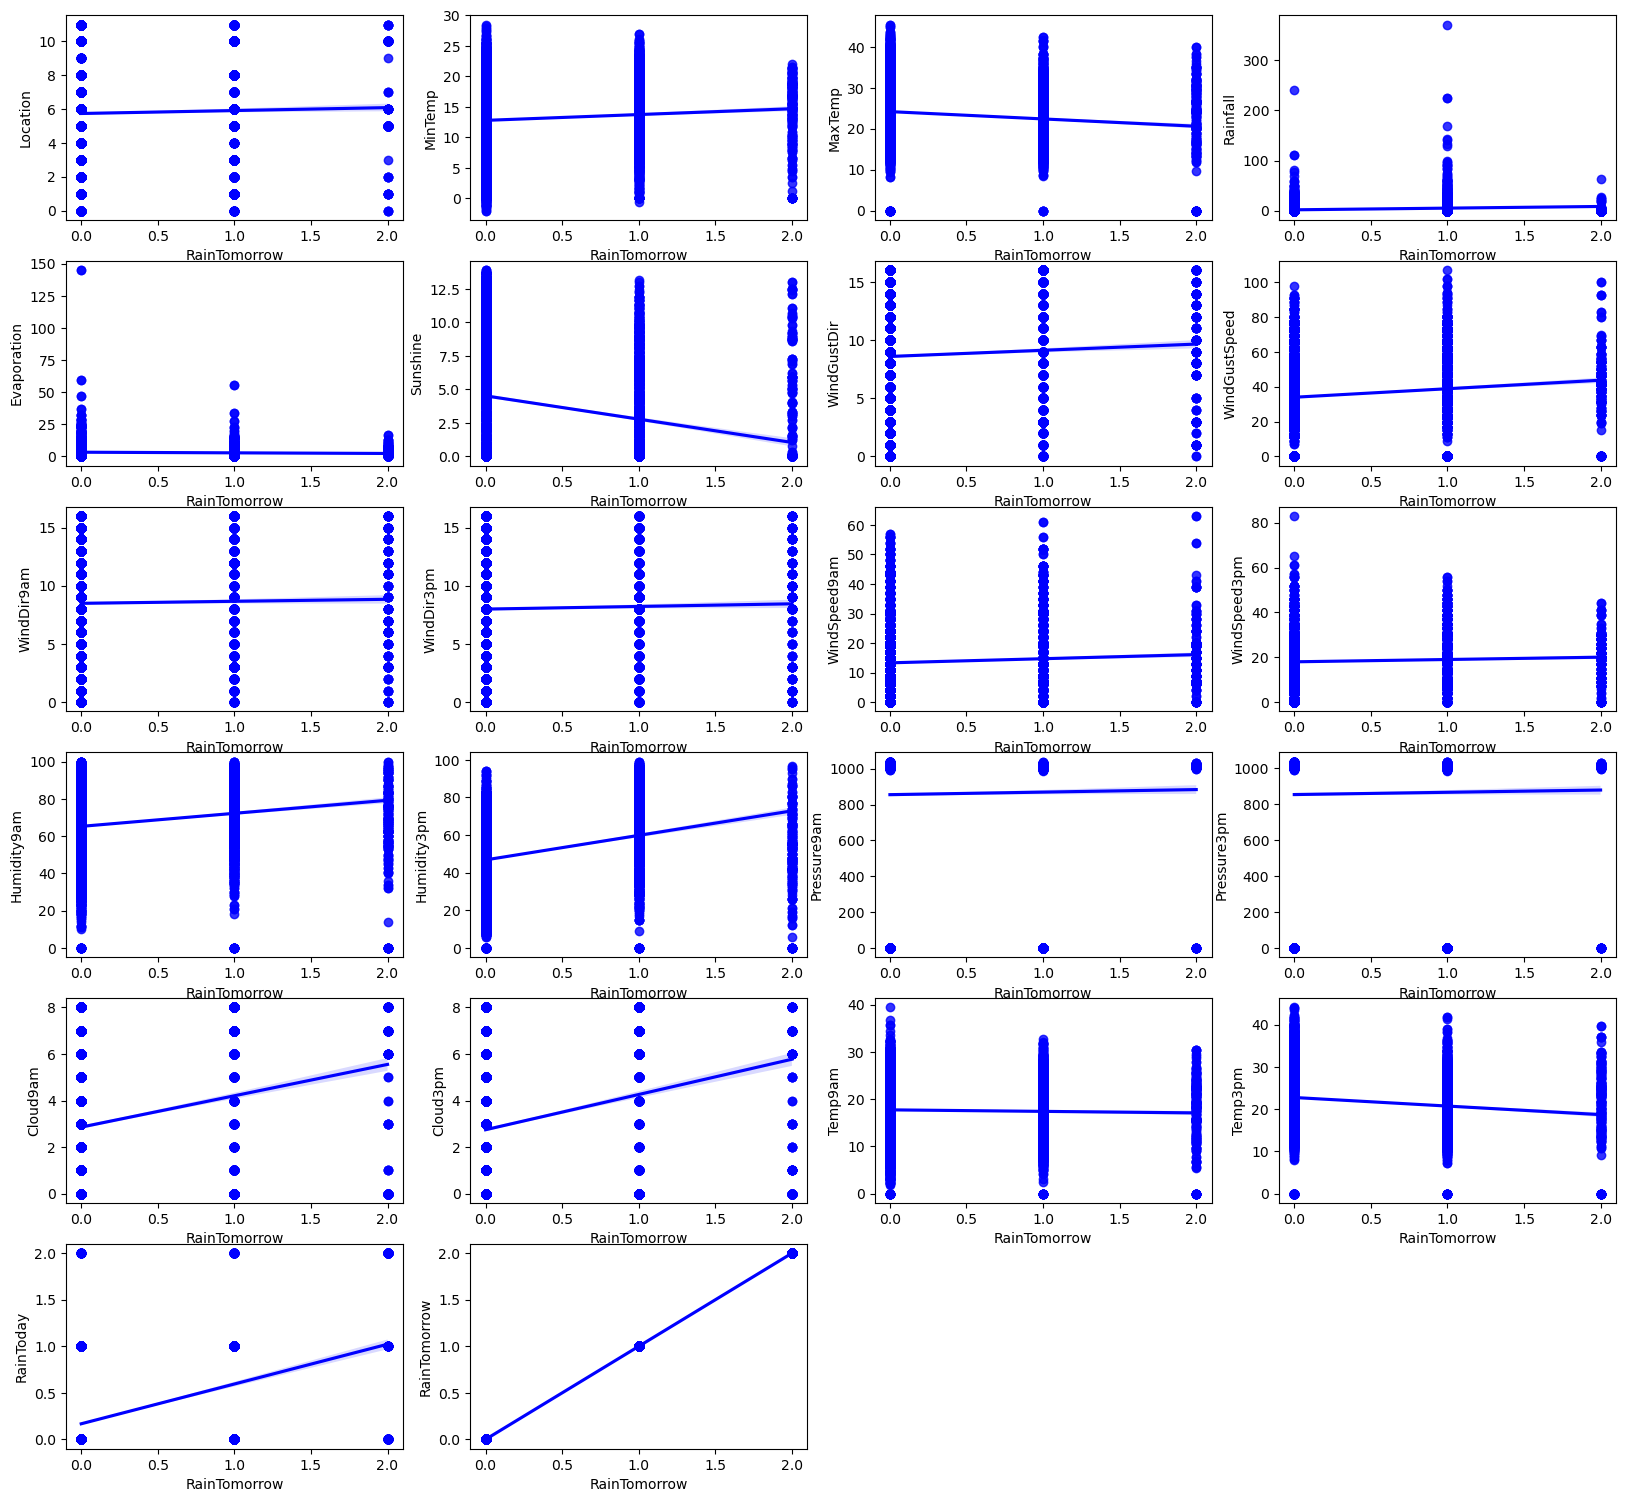

In [124]:
plt.figure(figsize=(20,25))
p=1
for i in df1:
    if p<=22:
        plt.subplot(8,4,p)
        sns.regplot(x='RainTomorrow', y=i, data = df1, color='b')
    p+=1
plt.show()

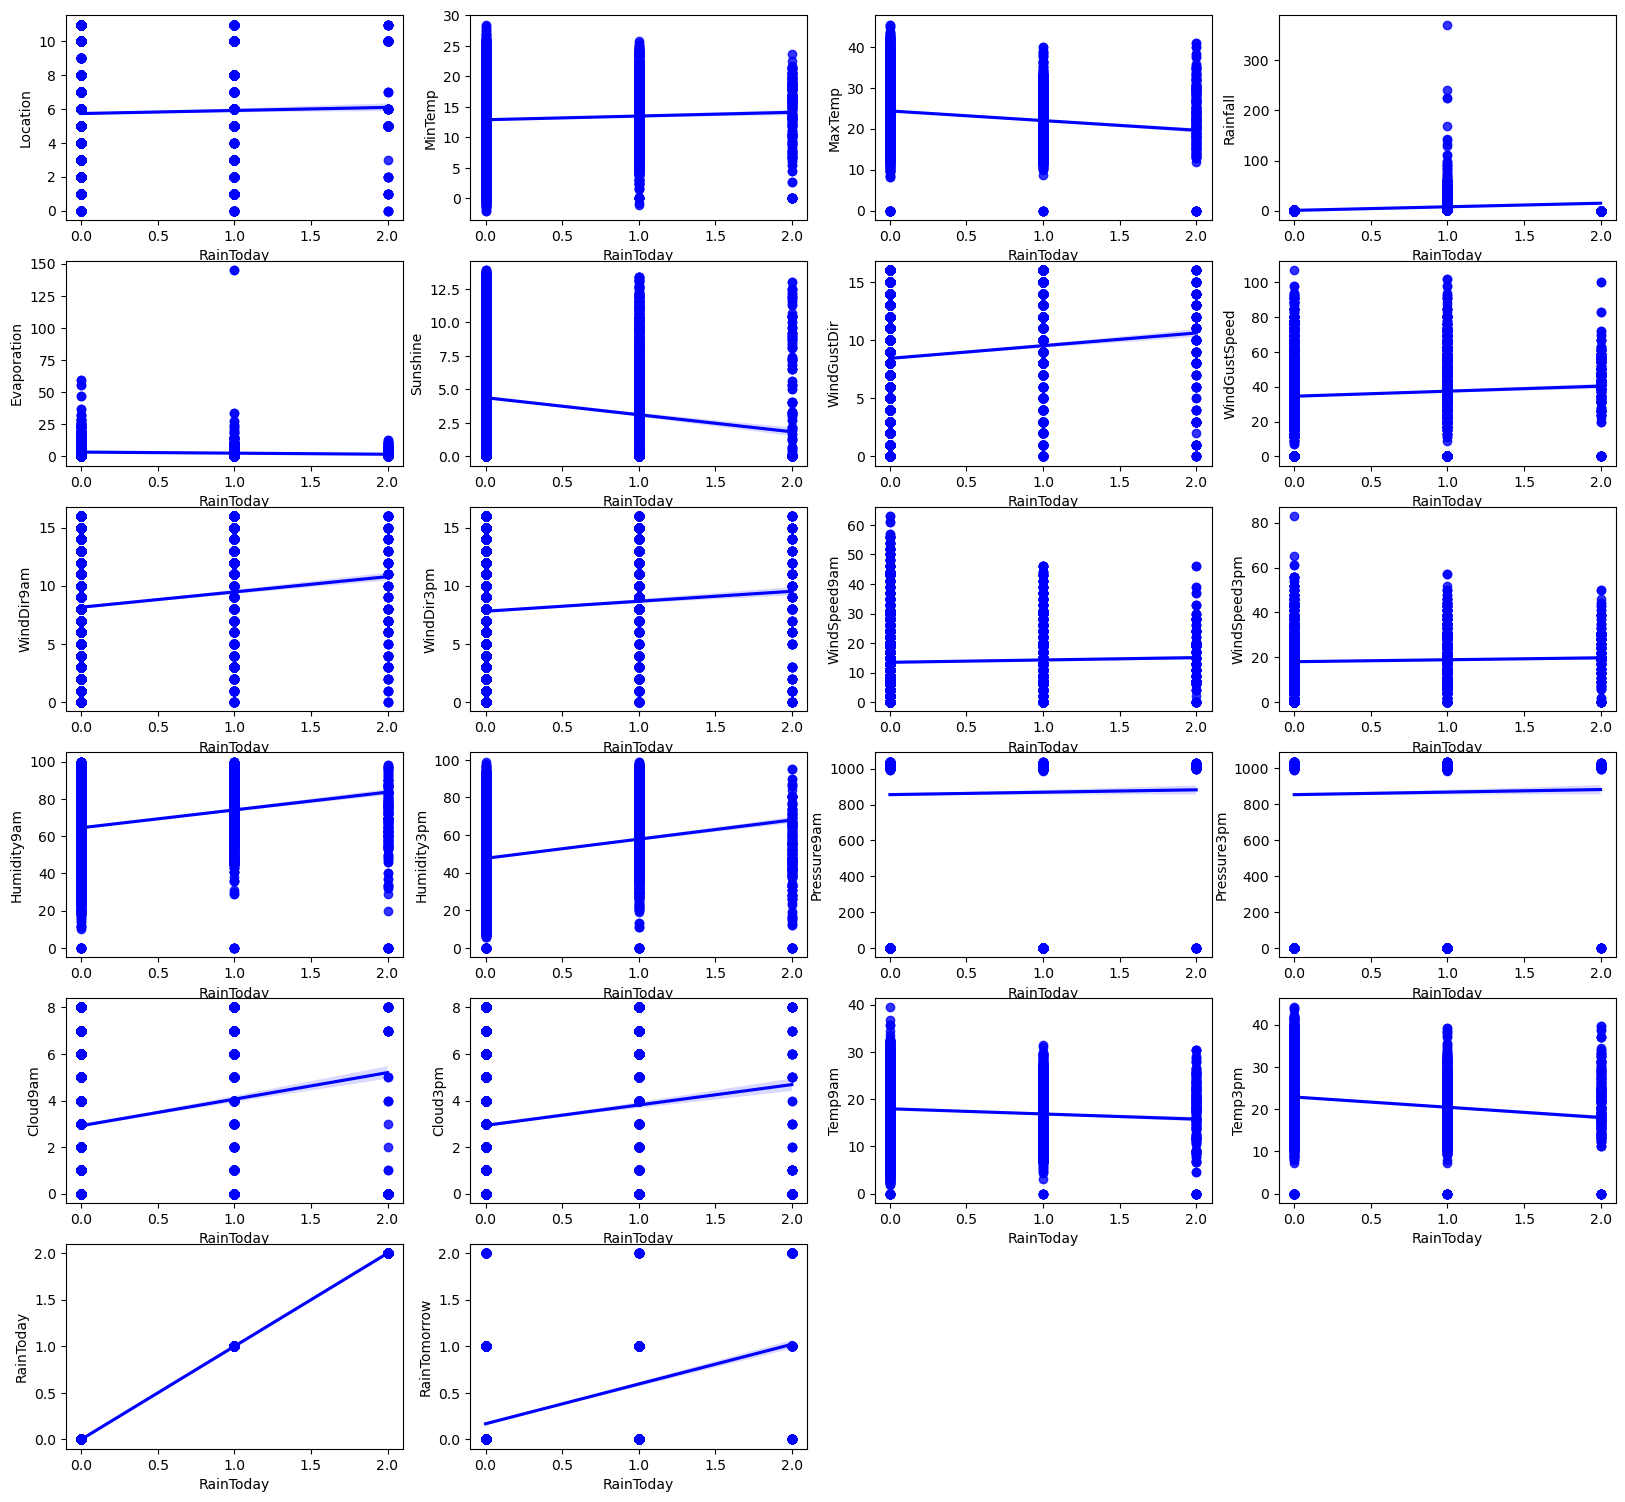

In [125]:
plt.figure(figsize=(20,25))
p=1
for i in df1:
    if p<=22:
        plt.subplot(8,4,p)
        sns.regplot(x='RainToday', y=i, data = df1, color='b')
    p+=1
plt.show()

In [126]:
#'Location', 'Evaporation','WindSpeed9am', 'WindSpeed3pm', 'Pressure9am','Pressure3pm' has not much impact on 'RainTomorrow'
# and 'RainToday' so we will drop those columns

In [127]:
df1.drop(['Location', 'Evaporation','WindSpeed9am', 'WindSpeed3pm', 'Pressure9am','Pressure3pm'], axis =1,inplace =True)
df1.head()

MinTemp  MaxTemp  Rainfall  Sunshine  WindGustDir  WindGustSpeed  \
0     13.4     22.9       0.6       0.0           13           44.0   
1      7.4     25.1       0.0       0.0           14           44.0   
2     12.9     25.7       0.0       0.0           15           46.0   
3      9.2     28.0       0.0       0.0            4           24.0   
4     17.5     32.3       1.0       0.0           13           41.0   

   WindDir9am  WindDir3pm  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  \
0          13          14         71.0         22.0       8.0       0.0   
1           6          15         44.0         25.0       0.0       0.0   
2          13          15         38.0         30.0       0.0       2.0   
3           9           0         45.0         16.0       0.0       0.0   
4           1           7         82.0         33.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  
0     16.9     21.8          0             0  
1     17.2     24.3          0             0  
2     21.0     23.2          0             0  
3     18.1     26.5          0             0  
4     17.8     29.7          0             0

In [128]:
df1.shape

(8425, 16)

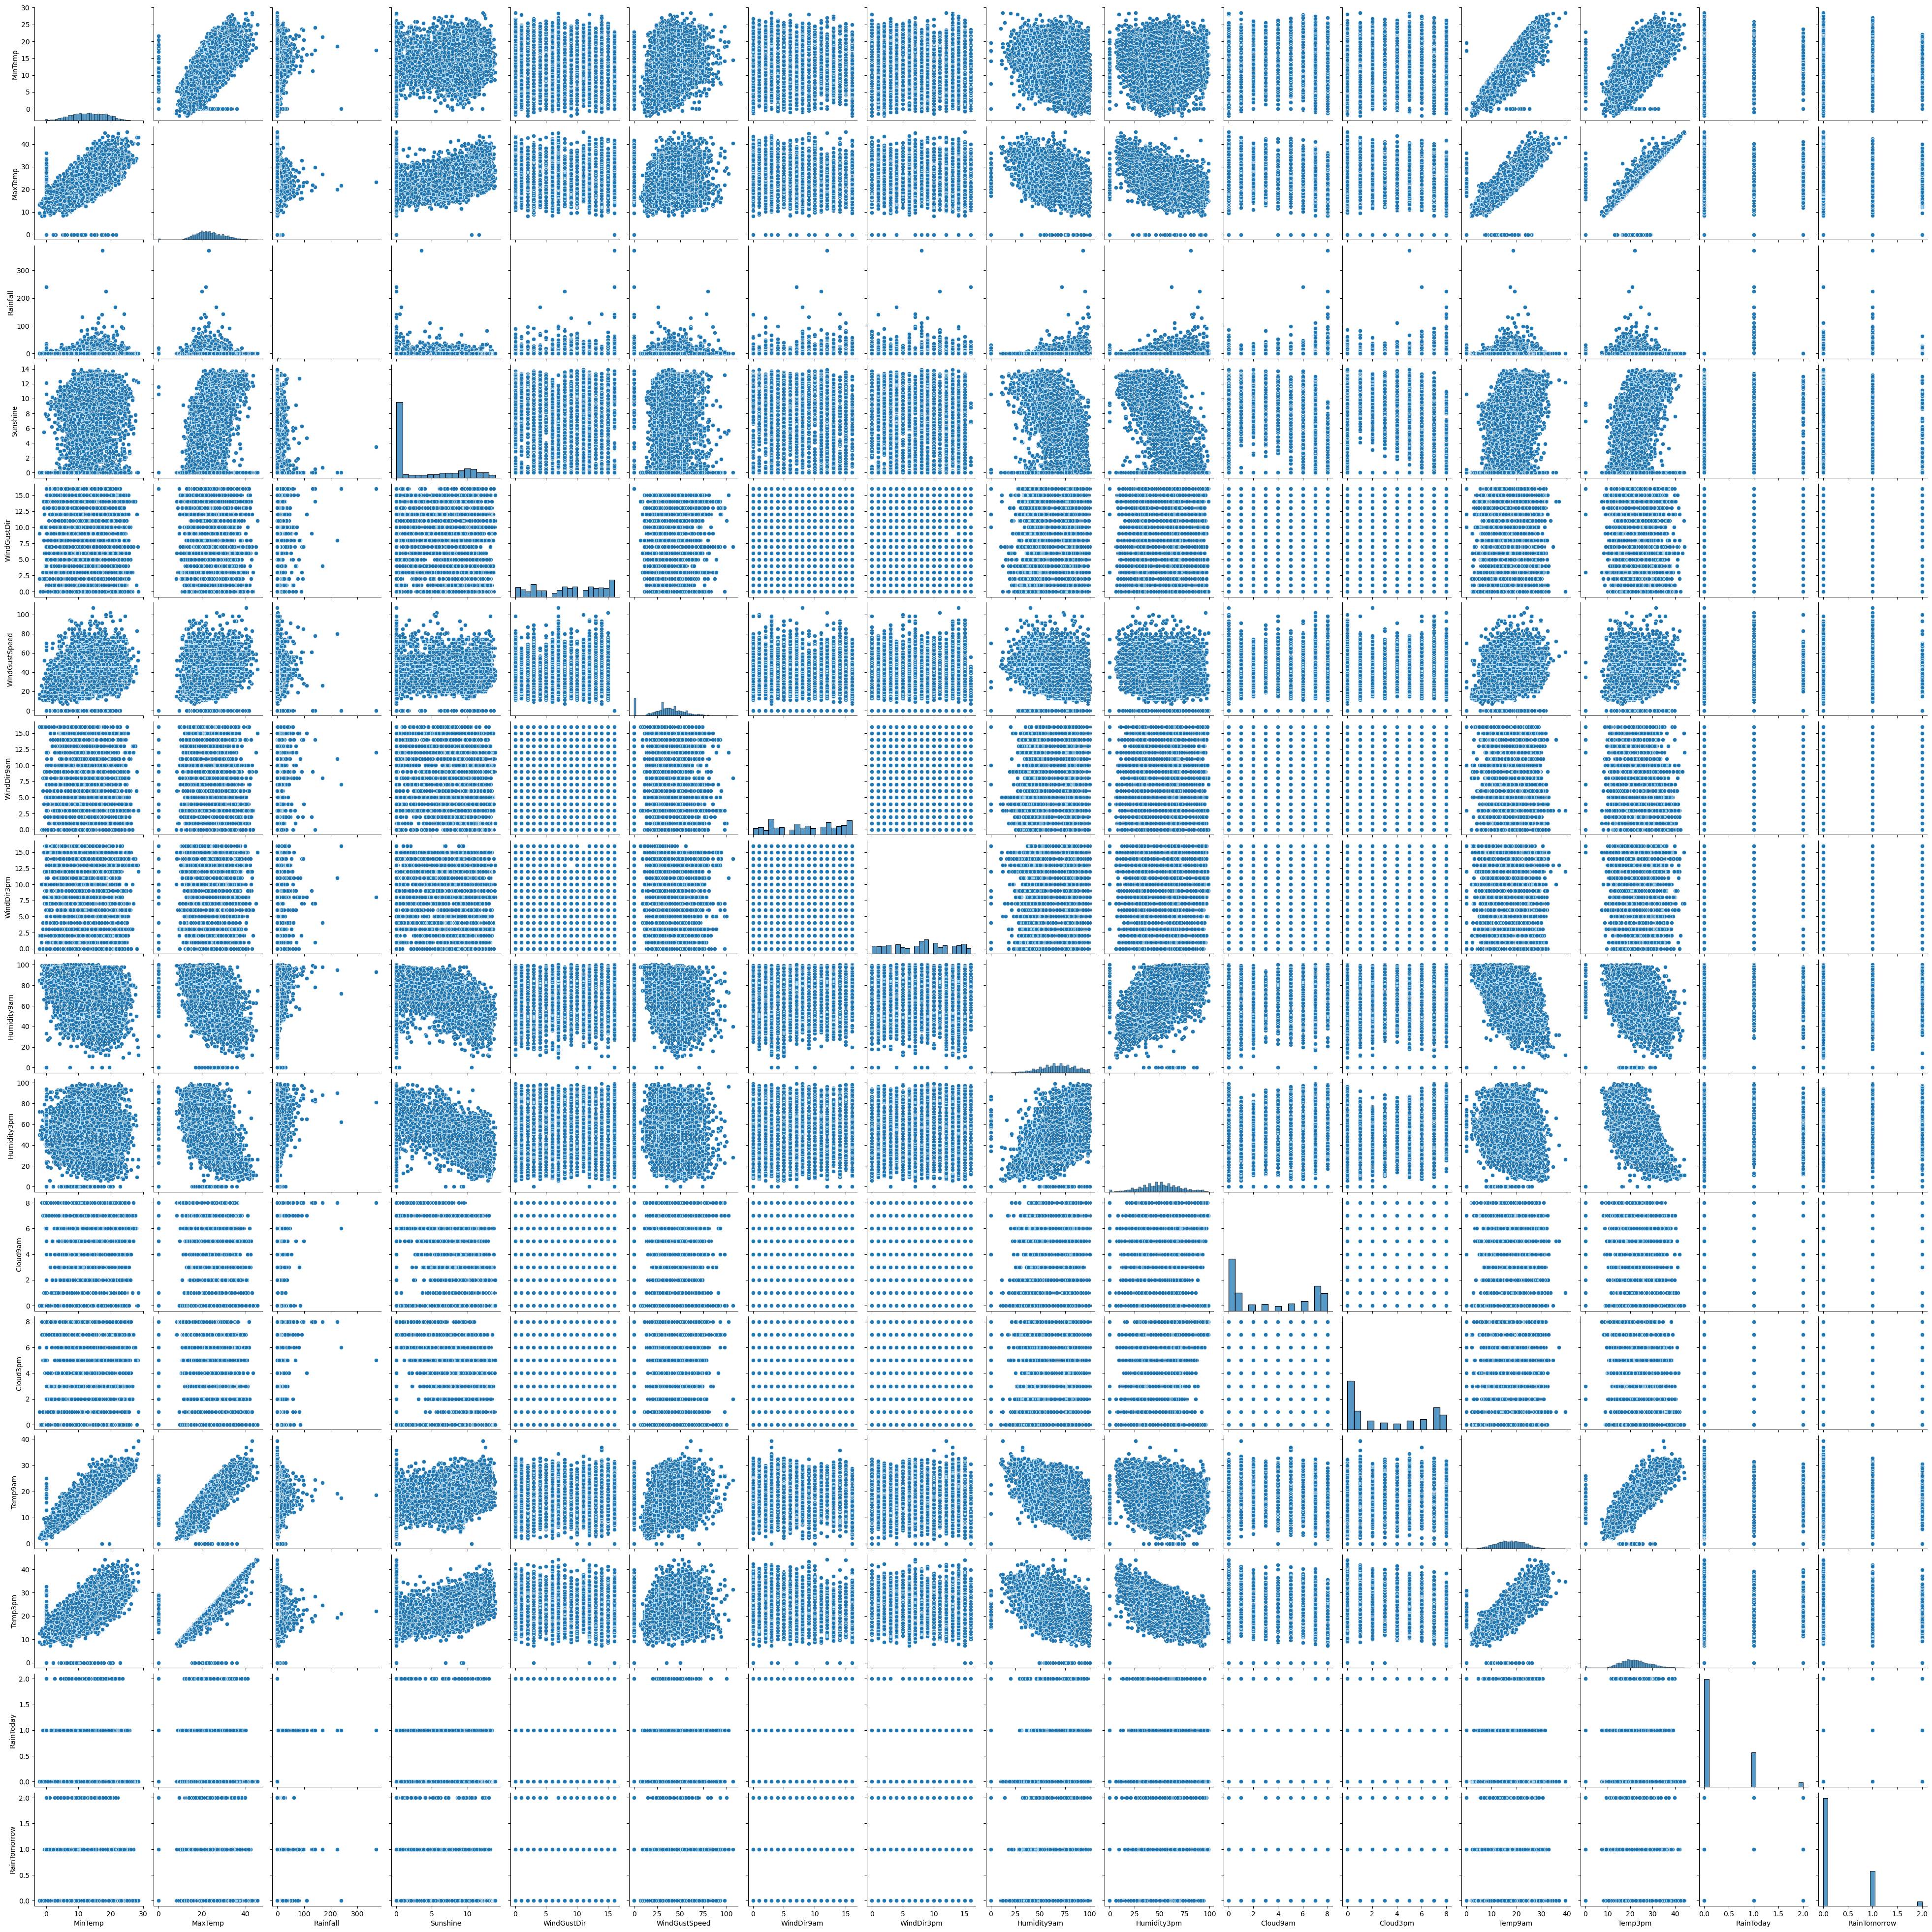

In [129]:
sns.pairplot(data=df1, palette ='Dark1') # checking corelation of the data


In [130]:
#removing skewness from data with Zscore method

In [131]:
from scipy.stats import zscore

In [132]:
df_1 = df1.copy()
z_score = zscore(df_1)
z_score_abs = np.abs(z_score)
df_n = df_1[(z_score_abs<3).all(axis=1)]
df_n.shape

(7799, 16)

In [133]:
df_n['RainTomorrow'].value_counts()

0    5996
1    1803
Name: RainTomorrow, dtype: int64

In [134]:
print('Data loss with Z-Score : ', 626/8425*100, '%')

Data loss with Z-Score :  7.43026706231454 %


In [135]:
df1=df_n

In [136]:
df1

MinTemp  MaxTemp  Rainfall  Sunshine  WindGustDir  WindGustSpeed  \
0        13.4     22.9       0.6       0.0           13           44.0   
1         7.4     25.1       0.0       0.0           14           44.0   
2        12.9     25.7       0.0       0.0           15           46.0   
3         9.2     28.0       0.0       0.0            4           24.0   
4        17.5     32.3       1.0       0.0           13           41.0   
...       ...      ...       ...       ...          ...            ...   
8419      3.5     21.8       0.0       0.0            0           31.0   
8420      2.8     23.4       0.0       0.0            0           31.0   
8421      3.6     25.3       0.0       0.0            6           22.0   
8422      5.4     26.9       0.0       0.0            3           37.0   
8423      7.8     27.0       0.0       0.0            9           28.0   

      WindDir9am  WindDir3pm  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  \
0             13          14         71.0         22.0       8.0       0.0   
1              6          15         44.0         25.0       0.0       0.0   
2             13          15         38.0         30.0       0.0       2.0   
3              9           0         45.0         16.0       0.0       0.0   
4              1           7         82.0         33.0       7.0       8.0   
...          ...         ...          ...          ...       ...       ...   
8419           2           0         59.0         27.0       0.0       0.0   
8420           9           1         51.0         24.0       0.0       0.0   
8421           9           3         56.0         21.0       0.0       0.0   
8422           9          14         53.0         24.0       0.0       0.0   
8423          10           3         51.0         24.0       3.0       2.0   

      Temp9am  Temp3pm  RainToday  RainTomorrow  
0        16.9     21.8          0             0  
1        17.2     24.3          0             0  
2        21.0     23.2          0             0  
3        18.1     26.5          0             0  
4        17.8     29.7          0             0  
...       ...      ...        ...           ...  
8419      9.4     20.9          0             0  
8420     10.1     22.4          0             0  
8421     10.9     24.5          0             0  
8422     12.5     26.1          0             0  
8423     15.1     26.0          0             0  

[7799 rows x 16 columns]

In [137]:
df1.skew()

MinTemp         -0.085790
MaxTemp          0.332617
Rainfall         3.469089
Sunshine         0.554303
WindGustDir     -0.159306
WindGustSpeed   -0.102588
WindDir9am      -0.057175
WindDir3pm      -0.059174
Humidity9am     -0.221981
Humidity3pm      0.116961
Cloud9am         0.296982
Cloud3pm         0.314416
Temp9am         -0.041719
Temp3pm          0.356006
RainToday        1.271225
RainTomorrow     1.275498
dtype: float64

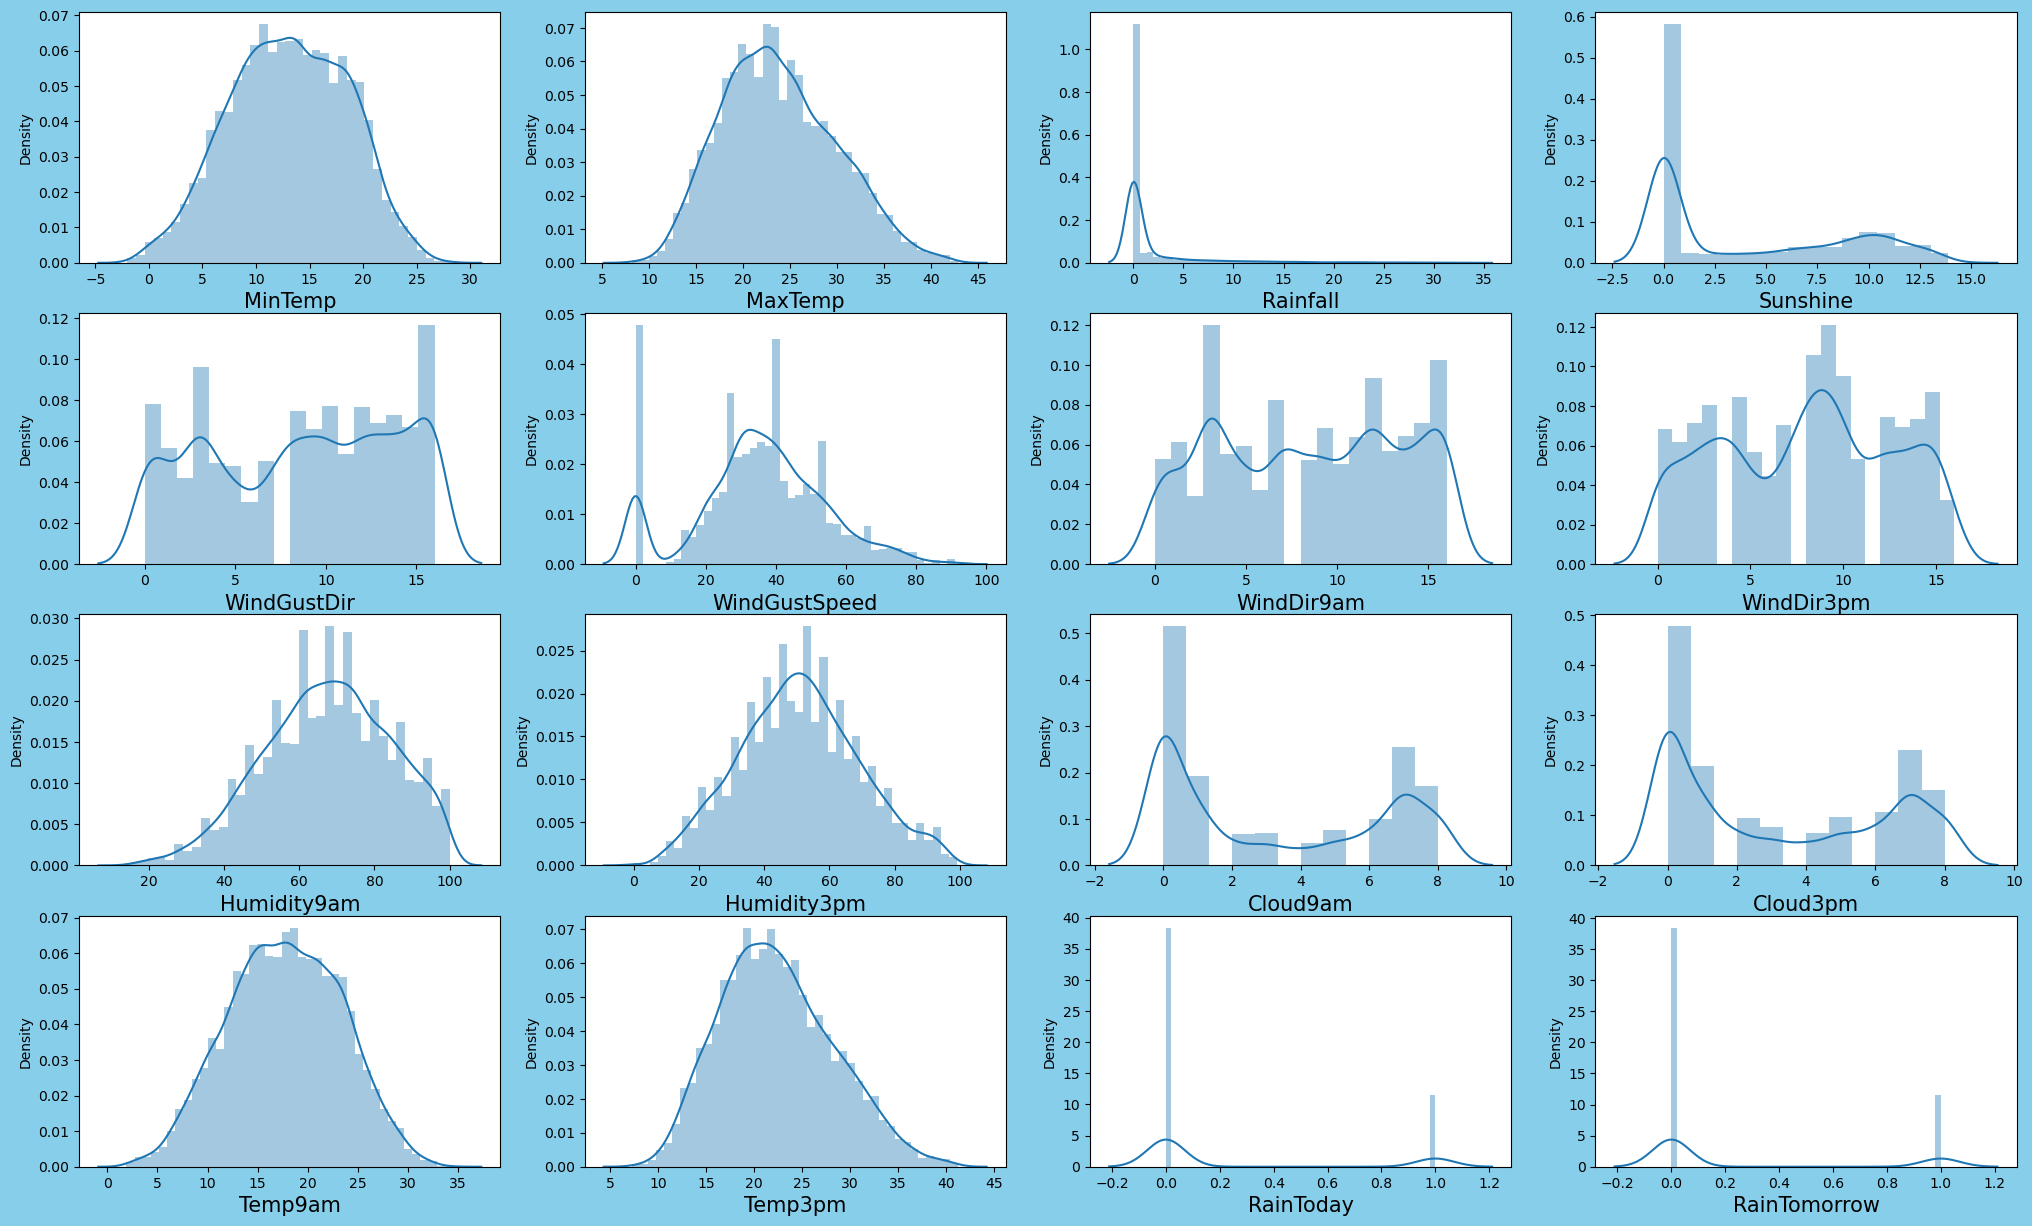

In [138]:
plt.figure(figsize=(25,15), facecolor = 'skyblue') # Checking data distribution
p = 1
for x in df1:
    if p<=16:
        x1= plt.subplot(4,4,p)
        sns.distplot(df1[x])
        plt.xlabel(x,fontsize=15)
        p+=1
plt.show()

In [139]:
# from above we can see that data has skew in perticular Cloud9am, Cloud3pm, WindDit9am, WindDir3pm, WindGustDir, WindGustSpeed

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df1 = pt.fit_transform(df1)
df1

pd.DataFrame(df1).skew().sort_values()

In [140]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7799 entries, 0 to 8423
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        7799 non-null   float64
 1   MaxTemp        7799 non-null   float64
 2   Rainfall       7799 non-null   float64
 3   Sunshine       7799 non-null   float64
 4   WindGustDir    7799 non-null   int32  
 5   WindGustSpeed  7799 non-null   float64
 6   WindDir9am     7799 non-null   int32  
 7   WindDir3pm     7799 non-null   int32  
 8   Humidity9am    7799 non-null   float64
 9   Humidity3pm    7799 non-null   float64
 10  Cloud9am       7799 non-null   float64
 11  Cloud3pm       7799 non-null   float64
 12  Temp9am        7799 non-null   float64
 13  Temp3pm        7799 non-null   float64
 14  RainToday      7799 non-null   int32  
 15  RainTomorrow   7799 non-null   int32  
dtypes: float64(11), int32(5)
memory usage: 883.5 KB


In [141]:
x= df1.drop(columns =['RainToday', 'RainTomorrow'])
y=df1['RainTomorrow']
z=df1['RainToday']

In [142]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow, Length: 7799, dtype: int32

In [143]:
from sklearn.preprocessing import power_transform
x= power_transform(x,method='yeo-johnson')
x

array([[ 0.06546368, -0.08080079,  0.74048472, ..., -1.22502226,
        -0.14492704, -0.0293862 ],
       [-1.03819808,  0.27842926, -0.66275004, ..., -1.22502226,
        -0.09151353,  0.38449079],
       [-0.02603808,  0.37316971, -0.66275004, ..., -0.05505002,
         0.58353852,  0.20558053],
       ...,
       [-1.746107  ,  0.31015567, -0.66275004, ..., -1.22502226,
        -1.21770711,  0.41651157],
       [-1.40959931,  0.55882545, -0.66275004, ..., -1.22502226,
        -0.93070051,  0.66737823],
       [-0.96417322,  0.57407505, -0.66275004, ..., -0.05505002,
        -0.46581866,  0.65196566]])

In [144]:
pd.DataFrame(x).skew()

0    -0.108398
1    -0.013966
2     1.017274
3     0.165849
4    -0.300545
5    -0.333967
6    -0.240831
7    -0.236628
8    -0.067372
9    -0.038508
10   -0.040491
11   -0.061105
12   -0.057485
13   -0.012752
dtype: float64

In [145]:
#applying SMOTE with Over Sampling

In [146]:
from imblearn.over_sampling import SMOTE

In [147]:
smt = SMOTE()
x_sample,y_sample = smt.fit_resample(x,y)

In [148]:
# Now we will build model

In [149]:
#Logistic Regression

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.svm import SVC
s = SVC()
from sklearn.metrics import accuracy_score, classification_report

In [151]:
for i in range(0,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = i, test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At Random state ',i, 'Model Training Accuracy is :', accuracy_score(y_train,pred_train)*100)
        print('At Random state ',i, 'Model Test Accuracy is     :', accuracy_score(y_test, pred_test)*100,'\n')
        

At Random state  94 Model Training Accuracy is : 83.09214141784209
At Random state  94 Model Test Accuracy is     : 83.11965811965813 

At Random state  169 Model Training Accuracy is : 83.11045979117054
At Random state  169 Model Test Accuracy is     : 83.07692307692308 

At Random state  230 Model Training Accuracy is : 83.07382304451365
At Random state  230 Model Test Accuracy is     : 83.07692307692308 

At Random state  246 Model Training Accuracy is : 83.14709653782744
At Random state  246 Model Test Accuracy is     : 83.11965811965813 

At Random state  247 Model Training Accuracy is : 83.03718629785675
At Random state  247 Model Test Accuracy is     : 82.991452991453 

At Random state  248 Model Training Accuracy is : 83.07382304451365
At Random state  248 Model Test Accuracy is     : 83.07692307692308 

At Random state  294 Model Training Accuracy is : 83.01886792452831
At Random state  294 Model Test Accuracy is     : 82.991452991453 

At Random state  295 Model Training Accu

In [152]:
# At Random state  1832 Model Training Accuracy is : 83.16541491115589
# At Random state  1832 Model Test Accuracy is     : 83.24786324786325 

#I will go with model 1832

In [153]:
# KNN

In [154]:
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state =i)
    knn.fit(x_train,y_train)
    x_pred = knn.predict(x_train)
    y_pred = knn.predict(x_test)
    print('At Random state',i, 'training model accuracy is:', accuracy_score(y_train,x_pred))
    print('At Random state',i, 'test model accuracy is    :', accuracy_score(y_test,y_pred),'\n')

At Random state 0 training model accuracy is: 0.8761677962996886
At Random state 0 test model accuracy is    : 0.8294871794871795 

At Random state 1 training model accuracy is: 0.8798314709653783
At Random state 1 test model accuracy is    : 0.8311965811965812 

At Random state 2 training model accuracy is: 0.8761677962996886
At Random state 2 test model accuracy is    : 0.8243589743589743 

At Random state 3 training model accuracy is: 0.8761677962996886
At Random state 3 test model accuracy is    : 0.8222222222222222 

At Random state 4 training model accuracy is: 0.8779996336325334
At Random state 4 test model accuracy is    : 0.8393162393162393 

At Random state 5 training model accuracy is: 0.8811137570983697
At Random state 5 test model accuracy is    : 0.8106837606837607 

At Random state 6 training model accuracy is: 0.8754350613665507
At Random state 6 test model accuracy is    : 0.8333333333333334 

At Random state 7 training model accuracy is: 0.8785491848323869
At Random s

In [155]:
# At Random state 93 training model accuracy is: 0.8743359589668438
# At Random state 93 test model accuracy is    : 0.8491452991452991 
#In KNN I will go with model 93

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state=93)

In [157]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [160]:
print('KNN Traing Score',knn.score(x_train,y_train))

KNN Traing Score 0.8743359589668438


In [161]:
print('KNN Test Score',knn.score(x_test,y_test) )

KNN Test Score 0.8491452991452991


In [162]:
#Decision Tree

In [163]:
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state =1)
    dt.fit(x_train,y_train)
    x_pre = dt.predict(x_train)
    y_pre = dt.predict(x_test)
    print('At Random state',i,'Train Accuracy is:',accuracy_score(y_train,x_pre))
    print('At Random state',i,'Test Accuracy is :',accuracy_score(y_test,y_pre),'\n')


At Random state 0 Train Accuracy is: 1.0
At Random state 0 Test Accuracy is : 0.8405982905982906 

At Random state 1 Train Accuracy is: 1.0
At Random state 1 Test Accuracy is : 0.8397435897435898 

At Random state 2 Train Accuracy is: 1.0
At Random state 2 Test Accuracy is : 0.8435897435897436 

At Random state 3 Train Accuracy is: 1.0
At Random state 3 Test Accuracy is : 0.8452991452991453 

At Random state 4 Train Accuracy is: 1.0
At Random state 4 Test Accuracy is : 0.8384615384615385 

At Random state 5 Train Accuracy is: 1.0
At Random state 5 Test Accuracy is : 0.8452991452991453 

At Random state 6 Train Accuracy is: 1.0
At Random state 6 Test Accuracy is : 0.8452991452991453 

At Random state 7 Train Accuracy is: 1.0
At Random state 7 Test Accuracy is : 0.8427350427350427 

At Random state 8 Train Accuracy is: 1.0
At Random state 8 Test Accuracy is : 0.8444444444444444 

At Random state 9 Train Accuracy is: 1.0
At Random state 9 Test Accuracy is : 0.8358974358974359 

At Random 

In [164]:
# At Random state 82 Train Accuracy is: 1.0
# At Random state 82 Test Accuracy is : 0.8461538461538461 

In [165]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.3, random_state= 82
                                               )
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [166]:
print('Train data score :', dt.score(x_train,y_train))
print('Test data score  :', dt.score(x_test,y_test))

Train data score : 1.0
Test data score  : 0.8371794871794872


In [167]:
# Performing Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [168]:
grid_param= { 'criterion':['ginni','entropy'], 'max_depth': range(15,20),'min_samples_leaf':range(2,6), 
            'min_samples_split':range(3,8), 'max_leaf_nodes':range(5,10)}

In [169]:
grid_search = GridSearchCV(estimator = dt, param_grid = grid_param, cv=10, n_jobs= -1)

In [170]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(15, 20),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [171]:
#Now checking DecisionTreeClassifier with new parameter

In [172]:
cnn= DecisionTreeClassifier(criterion = 'gini', max_depth = 15, max_leaf_nodes = 12, min_samples_split = 12)

In [173]:
best_parameter = grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [174]:
# Now lets train the model
cnn.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=12, min_samples_split=12)

In [175]:
print('On train model score: ', cnn.score(x_train,y_train))

On train model score:  0.8349514563106796


In [176]:
print('On test model score: ', cnn.score(x_test,y_test))

On test model score:  0.826068376068376


In [178]:
# Now with Random Forest¶

In [179]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [180]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state =i)
    rf.fit(x_train,y_train)
    x_pred= rf.predict(x_train)
    y_pred = rf.predict(x_test)
    print('At Random state', i ,'Training data accuracy is:',accuracy_score(y_train,x_pred))
    print('At Random state', i , 'Test Data accuracy is   :',accuracy_score(y_test,y_pred),'\n')

At Random state 0 Training data accuracy is: 1.0
At Random state 0 Test Data accuracy is   : 0.9008547008547009 

At Random state 1 Training data accuracy is: 0.9998168162667155
At Random state 1 Test Data accuracy is   : 0.8910256410256411 

At Random state 2 Training data accuracy is: 1.0
At Random state 2 Test Data accuracy is   : 0.8910256410256411 

At Random state 3 Training data accuracy is: 1.0
At Random state 3 Test Data accuracy is   : 0.8811965811965812 

At Random state 4 Training data accuracy is: 1.0
At Random state 4 Test Data accuracy is   : 0.8888888888888888 

At Random state 5 Training data accuracy is: 1.0
At Random state 5 Test Data accuracy is   : 0.8764957264957265 

At Random state 6 Training data accuracy is: 0.9998168162667155
At Random state 6 Test Data accuracy is   : 0.8841880341880342 

At Random state 7 Training data accuracy is: 1.0
At Random state 7 Test Data accuracy is   : 0.8854700854700854 

At Random state 8 Training data accuracy is: 1.0
At Random

In [181]:
# At Random state 0 Training data accuracy is: 1.0
# At Random state 0 Test Data accuracy is   : 0.9008547008547009 


In [182]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state= 1)

In [183]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [184]:
print('Train data score',rf.score(x_train,y_train))
print(' Test data score', rf.score(x_test,y_test))

Train data score 1.0
 Test data score 0.8901709401709401


In [185]:
# Hyperparameter Tuning
grid_param= { 'criterion':['ginni','entropy'], 'max_depth': range(15,20),'min_samples_leaf':range(2,6), 
            'min_samples_split':range(3,8), 'max_leaf_nodes':range(5,10)}

In [186]:
grid_search = GridSearchCV(estimator = dt, param_grid = grid_param, cv=10, n_jobs= -1)

In [187]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(15, 20),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [188]:
best_parameter = grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [189]:
# now with new parameters
rf = RandomForestClassifier(criterion='gini',max_depth= 25, max_leaf_nodes =78, min_samples_split =20)

In [190]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, max_leaf_nodes=78, min_samples_split=20)

In [191]:
print('score on training model:', rf.score(x_train,y_train))
print('score on testdata model:', rf.score(x_test,y_test))

score on training model: 0.8889906576296025
score on testdata model: 0.8512820512820513


In [192]:
#Now Let's check with SVM

In [193]:
from sklearn.svm  import SVC
s=SVC()

In [194]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state =i)
    s.fit(x_train,y_train)
    x_pre = s.predict(x_train)
    y_pre = s.predict(x_test)
    print('At random state',i,'Train accuracy is:', accuracy_score(y_train,x_pre))
    print('At random state',i,'Test accuracy is :', accuracy_score(y_test,y_pre),'\n')

At random state 0 Train accuracy is: 0.8574830555046712
At random state 0 Test accuracy is : 0.8534188034188034 

At random state 1 Train accuracy is: 0.8609635464370764
At random state 1 Test accuracy is : 0.8405982905982906 

At random state 2 Train accuracy is: 0.8611467301703609
At random state 2 Test accuracy is : 0.847008547008547 

At random state 3 Train accuracy is: 0.8626122000366367
At random state 3 Test accuracy is : 0.85 

At random state 4 Train accuracy is: 0.8598644440373695
At random state 4 Test accuracy is : 0.8517094017094017 

At random state 5 Train accuracy is: 0.8642608536361971
At random state 5 Test accuracy is : 0.841025641025641 

At random state 6 Train accuracy is: 0.8587653416376626
At random state 6 Test accuracy is : 0.8491452991452991 

At random state 7 Train accuracy is: 0.8633449349697747
At random state 7 Test accuracy is : 0.8444444444444444 

At random state 8 Train accuracy is: 0.859314892837516
At random state 8 Test accuracy is : 0.8461538461

In [195]:
# At random state 44 Train accuracy is: 0.8605971789705075
# At random state 44 Test accuracy is : 0.8517094017094017 

In [196]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=44)

In [197]:
s.fit(x_train,y_train)

SVC()

In [198]:
print('Train score', s.score(x_train,y_train))
print('Test score', s.score(x_test,y_test))

Train score 0.8605971789705075
Test score 0.8517094017094017


In [199]:
# applying Hps-T
from sklearn.metrics import accuracy_score,classification_report

In [200]:
param_grid = {'C':[10,15,20], 'gamma':[0.001,0.01,0.02,0.002]}

In [201]:
gridsearch= GridSearchCV(s,param_grid)

In [202]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 15, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [203]:
svc = SVC(C=12,gamma=0.05)
svc.fit(x_train,y_train)

SVC(C=12, gamma=0.05)

In [204]:
print('Score on training:', svc.score(x_train,y_train))
print('Score on testdata:', svc.score(x_test,y_test))

Score on training: 0.8900897600293094
Score on testdata: 0.8534188034188034


In [205]:
 #AUC ROC curve

In [206]:
from sklearn.metrics import roc_curve,auc

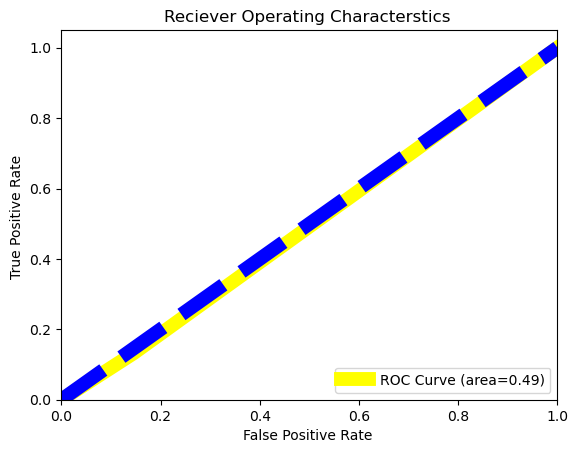

In [207]:
fpr,tpr,threshold = roc_curve(y_test,y_pre)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='yellow',lw=10,label='ROC Curve (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.title("Reciever Operating Characterstics ")
plt.legend(loc='lower right')
plt.show()

In [208]:
import pickle
filename ='RainForecast.pkl'
pickle.dump(rf,open(filename,'wb'))

In [209]:
#conclusion

In [210]:
loaded_model = pickle.load(open('RainForecast.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

87.82051282051282


In [211]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]], index=['Predicted','Original'])
conclusion

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted     0     0     0     0     1     0     0     0     0     0  ...   
Original      0     0     0     0     0     0     0     0     0     0  ...   

           2330  2331  2332  2333  2334  2335  2336  2337  2338  2339  
Predicted     0     0     1     0     0     0     0     0     0     0  
Original      0     0     1     0     1     1     0     0     0     0  

[2 rows x 2340 columns]

In [212]:
#We use SVM Machine learning algorithm.for predicting model. where 1 - Rain is going to happen and 0- no rain for the next day